<h1 align='center'>Taller 2: Simulación de Monte Carlo</h1>

### María Sofía Álvarez López - 201729031
### Joaquin Peñuela Parra - 201814689

**Resumen:** En este documento se presenta el informe del taller 2 de física de partículas donde se replico el gráfico de armenteros reportado en la referencia [1] y se estudio como afectaba el smearing a la simulación. Se observó que entre mayor sea el smearing, la resolución de la gráfica se ve afectada en mayor medida. En particular se observó que el smearing en $E$ y $\phi$ afecta más que el smearing en $\theta$. En adición a esto, al reconstruir la masa del decaimiento se evidenció que entre mayor sea el smearing de los datos, es más difícil identificar a que partícula hace referencia la masa reconstruida. Finalmente, etiquetando las partículas en la simulación se encontró una concentración del 22.20% de partículas $K_{0}$ coladas en la ventana 2d de las partículas $\Lambda_{0}$ y una concentración del 15% de partículas $\Lambda_{0}$ coladas en la ventana 2d de las partículas $K_{0}$.

Para el desarrollo de este taller se optó por utilizar python como lenguaje de programación. Además, con el objetivo de poder poner las ecuaciones y el código correspondiente en cada parte, decidimos presentar el informe utilizando el formato de Jupyter Notebook. De esta manera, se espera que el lector pueda entender en detalle cada linea de código.


Para el desarrollo de este taller se optó por utilizar python como lenguaje de programación. Además, con el objetivo de poder poner las ecuaciones y el código correspondiente en cada parte, decidimos presentar el informe utilizando el formato de Jupyter Notebook. De esta manera, se espera que el lector pueda entender en detalle cada linea de código.

In [1]:
# Paquetes y librerías utilizadas en este proyecto:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore", category=RuntimeWarning)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

<b> Objetivo: </b> Reproducir el gráfico de Armenteros-Podolanski para la identificación de partículas en iones pesados.

En vista de llegar a este objetivo, seguimos los pasos propuestos en la guía del taller 2.

### Paso 1 - Input:
En este paso se declararon variables con los valores de las masas de cada partícula siguiendo la siguiente tabla:

\begin{array}{ll}
\textbf{Particula} & \mathbf{Masa {[}MeV{]}}\\
\Lambda^0    & 1115.63        \\
p         & 938.27231         \\
K         & 497.671         \\
\pi        & 139.56755        
\end{array}

In [2]:
# Masas en reposo de las particulas lambda, p, K y pi

MLo = 1115.63 # (MeV)
mP = 938.27231 # (MeV)
MKo = 497.671 # (MeV)
mPI = 139.56755 # (MeV)

Luego definimos el número de eventos a simular:

In [3]:
Nevent = 1000000

### Paso 2 - Selección del proceso:

En este paso creamos una función que permitiera generar eventos de manera aleatoria. Estos eventos pueden ser la descomposición de $K^0 \rightarrow \pi^+\pi^-$, las cuales se generaban con un 50% de probabilidad, $\bar{\Lambda} \rightarrow p + \pi^-$, con un 25% de probabilidad, y $\Lambda \rightarrow \pi^- + p$, con un 25% de probabilidad.

In [4]:
# Funcion que genera n eventos entre 0 y 1, y se hace conteo de los decaimientos K
# Lambda y Antilambda. En este caso, se toma que si el valor del arreglo esta entre
# 0 y 0.5, este sera un decaimiento K. Si se encuentra entre 0.5 y 0.75 sera el
# Decaimiento de un Antilambda. De lo contrario, sera el decaimiento de una particula
# Lambda

def generar_eventos(n):
    eventos = np.random.rand(n)
    eventos_k, eventos_anti_lambda, eventos_lambda = [],[],[]
    for evento in eventos:
        if evento < 0.5:
            eventos_k.append(evento)
        elif evento >= 0.5 and evento < 0.75:
            eventos_anti_lambda.append(evento)
        else:
            eventos_lambda.append(evento)
    return eventos_k, eventos_anti_lambda, eventos_lambda

Utilizando esta función se calculó la cantidad de eventos para cada proceso

In [5]:
eventos_k, eventos_anti_lambda, eventos_lambda = generar_eventos(Nevent)

# Numero de eventos de cada tipo 

n_k = len(eventos_k)
n_anti_lambda = len(eventos_anti_lambda)
n_lambda = len(eventos_lambda)

### Paso 3 - Elegir energía de M (Partícula que decae):

Esta energía se calculó de manera aleatoria siguendo una distribucion de probabilidad normal con media $2M$ y desviacion estandar $0.2M$, donde M es la masa de la particula madre.

### Paso 4 - Determinación del momento de M (Partícula que decae):

Utilizando la energía del paso 3 se calculó el momento de la partícula $$p = \sqrt{E^2-m^2}$$

Desde aquí en adelante se donotó $S_{lab}$ como el sistema de laboratorio y $S_{reposo}$ como el sistema donde M reposa, con esto en mente, para pasar de un sistema al otro es necesario conocer los valores  $\gamma$ y $\beta \gamma$ que describen las transformaciones de Lorentz.

### Paso 5 - Cálculo de $\gamma$ y $\beta \gamma$:

Ahora bien, a continuación se demuestra que $\gamma$ y $\gamma\beta$ se pueden encontrar en función de $E$ y $p$ de la particula madre. En donde
$$\gamma = \frac{1}{\sqrt{1-\beta^2}}$$

$$\beta = \frac{v}{c}$$
donde c es la velocidad de la luz en el vacío. Nuevamente, por la metodología de trabajo $c=1$.

De esta forma, según la cinemática relativista es posible encontrar una relación entre $E$, $p$, la masa en reposo $m$, $\gamma$ y $\beta$. En primer lugar, se sabe que

$$E = Mc^2$$

Donde M es la masa de la partícula al moverse, y puede escribirse como $M = \gamma m$. De la misma forma, como se trabaja en unidades naturales, $c=1$

$$E = \gamma m$$

Por lo tanto, al despejar $\gamma$ se obtiene que

$$\gamma = \frac{E}{m}$$

Por su lado, el momento también se ve afectado por el aumento relativista de la masa en el factor $\gamma$. Por lo tanto, el momento se escribe como

$$p = \gamma mv$$

Como $c = 1$, se puede decir que $v = v/c = \beta$. Por lo tanto

$$p = \gamma\beta m$$

Despejando $\gamma\beta$

$$\gamma\beta=\frac{p}{m}$$

Por lo tanto, se concluye que

$$\mathbf{\gamma = \frac{E}{m}}$$

$$\mathbf{\gamma\beta=\frac{p}{m}}$$

Estos últimos tres pasos se resumieron en la siguiente función:

In [6]:
# Funcion que dada la masa de la particula madre genera 
# aleatoriamente valores para la energia con el que calcula
# los factores gamma y beta

def e_p_madre(M):
    E_madre = np.random.normal(2*M, 0.2*M)
    p_madre = np.sqrt(E_madre**2 - M**2)
    gamma = E_madre/M
    gamma_beta = np.linalg.norm(p_madre)/M
    return gamma, gamma_beta

### Paso 6 - Análisis desde el sistema donde M está en reposo:

En este punto consideramos el sistema $S_{reposo}$ donde la partícula esta en reposo.

Para calcular la energia de cada particula luego del decaimiento se define $P$ como el cuadrivector de la particula madre. Como en este caso se quiere calcular $P$ respecto al centro de masa ($P^{reposo}$) sabemos que el momento será cero, mientras que la energía corresponderá a la masa en reposo de la partícula, puesto que la partícula se encuentra en resposo respecto a si misma. De esta forma, se puede afirmar que

$$P^{reposo} =  (M,\vec{0})$$

Asimismo, debido a la conservacion de la energia y del momento, se sabe que $P^{reposo} = p_1^{reposo} + p_2^{reposo}$, donde $p_1^{reposo}$ es el cuadrimomento de la particula 1 y $p_2^{reposo}$ el de la particula 2. En primer lugar, se despeja el cuadrumomento 2.

$$p_2^{reposo} = P^{reposo} - p_1^{reposo}$$

Ahora, al elevar al cuadrado a ambos lados

$$(p_2^{reposo})^2 = (P^{reposo} - p_1^{reposo})^2=(P^{reposo})^2-2P^{reposo}p_1^{reposo} + (p_1^{reposo})^2$$

Por otro lado, se sabe que dado el cuadrumomento $p_i$, cuando este se eleva al cuadrado se obtiene que $p_i^2=E_i^2 - p_i^2 = m_i^2$. Asimismo, si hacemos el producto punto $P^{reposo} \bullet p_1^{reposo} = (M,0,0,0)\bullet(E_1,p_x,p_y,p_z) = ME_1$. En este sentido, se puede escribir que

$$m_2^2=M^2-2ME_1^{reposo}+m_1^2$$

Despejando la energía de la partícula 1 se obtiene que 

$$E_1^{reposo} = \frac{M^2+m_1^2-m_2^2}{2M}$$

Ahora bien, dado que la energía se debe conservar

$$E_2^{reposo}=M-E_1^{reposo} = M-\frac{M^2+m_1^2-m_2^2}{2M}$$

Por lo tanto

$$E_2^{reposo}=M-E_1^{reposo} = \frac{2M^2 - M^2- m_1^2+m_2^2}{2M}$$

$$E_2^{reposo} = \frac{M^2+m_2^2-m_1^2}{2M}$$

Es decir, las energías se calcularán como

$$E_1^{reposo} = \frac{M^2+m_1^2-m_2^2}{2M}$$
$$E_2^{reposo} = \frac{M^2+m_2^2-m_1^2}{2M}$$

Asimismo, se realizó el cálculo del momento según la ecuación para la energía de Einstein

$$\mathbf{(E_i^{reposo})^2 = (mc^2)^2 + (p_i^{reposo}c)^2}$$

En este caso $c=1$, puesto que se trabaja en unidades naturales. Por lo tanto, al despejar el momento respecto al centro de masa

$$ \mathbf{p_i^{reposo} = \sqrt{(E_i^{reposo})^2 - (m_i)^2}}$$

Donde $i = 1,2$.

Utilizando estas dos últimas ecuaciones se definió la siguiente función:

In [7]:
# Funcion que, dada la masa de la particula madre y las masas de las
# particulas 1 y 2 generadas, retornan la energia y momentos de las 
# particulas generadas en el decaimiento medido respecto al centro 
# de masas de la particula

def energia_momento_reposo(M,m_1,m_2):
    # Calculo de las energias
    E1_reposo = (M**2 + m_1**2 - m_2**2)/(2*M)
    E2_reposo = (M**2 + m_2**2 - m_1**2)/(2*M)
    # Calculo de los momentos
    p1_reposo = np.sqrt(E1_reposo**2 - m_1**2)
    p2_reposo = np.sqrt(E2_reposo**2 - m_2**2)
    return E1_reposo, p1_reposo, E2_reposo, p2_reposo

Utilizando esta función se calcularón las energías y los momentos correspondiente a cada decaimiento

In [8]:
# Energia y momento de las particulas de un decaimiento K
e_K_p1_reposo, p_K_p1_reposo, e_K_p2_reposo, p_K_p2_reposo = energia_momento_reposo(MKo, mPI, mPI)

# Energia y momento de las particulas de un decaimiento anti-lambda

e_al_p1_reposo, p_al_p1_reposo, e_al_p2_reposo, p_al_p2_reposo = energia_momento_reposo(MLo, mP, mPI)

# Energia y momento de las particulas de un decaimiento lambda
e_l_p1_reposo, p_l_p1_reposo, e_l_p2_reposo, p_l_p2_reposo = energia_momento_reposo(MLo, mPI, mP)

### Paso 7 - Elegir direcciones de los productos:

Hasta el momento ya se determinó la energía y el momento que poseen los productos del decaimiento. En este paso se elige de manera aleatoría la dirección que toman estos productos del decaimiento (partículas 1 y 2). 

Para esto, denotaremos $\theta$ como el ángulo polar (medido respecto al eje x) y $\phi$ como el ángulo azimutal. 

Resumiendo el ángulo $\phi$ se calculó a través de una distribución uniforme entre 0 y $2\pi$, mientras que el ángulo polar se calculó teniendo en cuenta que $\cos(\theta)$ debe poseer una distribución uniforme entre $-1$ y $1$.

In [9]:
# Generacion aleatoria de angulos theta y phi

def generar_theta_phi_reposo():
    u = np.random.uniform(-1, 1)
    theta = np.arccos(u)
    phi = np.random.uniform(0, 2*np.pi)
    return theta, phi

Utilizando estos ángulos $\theta$ y $\phi$ se calcularón las componentes del momento de la partícula 1 utilizando las siguientes ecuaciones:

$$p_{1,x}^{reposo} = p_{1}^{reposo} \cos{(\theta)}$$
$$p_{1,y}^{reposo} = p_{1}^{reposo}\sin{(\theta)}\cos{(\phi)}$$
$$p_{1,z}^{reposo} = p_{1}^{reposo}\sin{(\theta)}\sin{(\phi)}$$

Por otro lado, dado que el momento se debe conservar en el marco de reposo ($S_{reposo}$), es claro que:

$$\vec{p}_2=-\vec{p}_1$$

Utilizando estas expresiones se definio la siguiente función que permite calcular las componentes del momento para la partícula 1:

In [10]:
# Funcion que dada la magnitud del momento y su direccion
# polar y azimutal encuentra las componentes x, y y z del
# vector momento p

def componentes_p(p, theta, phi):
    p_x = p*np.cos(theta)
    p_y = p*np.sin(theta)*np.cos(phi)
    p_z = p*np.sin(theta)*np.sin(phi)
    return p_x, p_y, p_z

Por otro lado, para analizar las componentes de los momentos correspondiente a cada desintegración del número total de eventos se definio la siguiente función:

In [11]:
# Funcion que dado el numero de desintegraciones de cada
# tipo que se generan, genera datos aleatorios de direccion
# y calcula las componentes x, y y z del vector de momento

def p_particulas_reposo(n_k, n_anti_lambda, n_lambda):
    # Numero total de descomposiciones medidas
    n = n_k + n_anti_lambda + n_lambda
    
    # Vector donde se almacenan los momentos de la particulas
    # 1 y 2 generadas en la descomposicion
    p_p1_reposo = np.zeros((n,3))
    p_p2_reposo = np.zeros((n,3))
    
    # Se llenan los datos
    for i in range(n):
        
        # Se selecciona el momento segun el tipo de colision al que pertenece
        # utilizando las variables p_K_p1_reposo, p_al_p1_reposo y p_l_p1_reposo
        # calculadas anteriormente.
        momento = p_K_p1_reposo if i<n_k else p_al_p1_reposo if i<n_k+n_anti_lambda else p_l_p1_reposo
        
        # Se generan las direcciones de forma aleatoria y se calculan las componentes
        # x, y y z del vector de momentos y se añaden al arreglo que se retornara
        theta, phi = generar_theta_phi_reposo()
        p_p1_reposo[i] = componentes_p(momento, theta, phi)
        p_p2_reposo[i] = -p_p1_reposo[i]
        
    return p_p1_reposo, p_p2_reposo

Utilizando esta función se calcularón los momentos x, y y z de los productos de los 100000 eventos.

In [12]:
p_p1_reposo, p_p2_reposo = p_particulas_reposo(n_k, n_anti_lambda, n_lambda)

### Paso 8 - Transformaciones de Lorentz entre los sistemas $S_{lab}$ y $S_{reposo}$:

Utilizando los $\gamma$ y $\beta \gamma$ definidos en el paso 5, para pasar del sistema en reposo al sistema de laboratorio basta transformar el 4-vector de momento de S$S_{reposo} utilizando la siguiente ecuación:

$$P_{lab}^{\mu} = \Lambda_{\nu}^{\mu}P_{reposo}^{\nu}$$

Donde $\Lambda_{\nu}^{\mu}$ es la matriz de Lorentz.

### Paso 9 - Energías y momentos resultantes en $S_{lab}$:

Utilizando la anterior ecuación es evidente que las energías y los momentos de las partículas en el sistema de laboratorio están dados de la forma:

$$
\begin{pmatrix}
E_{lab} \\
p_{x_{lab}} \\
p_{y_{lab}} \\
p_{z_{lab}} \\
\end{pmatrix} = 
\begin{pmatrix}
\gamma & \gamma\beta & 0 & 0 \\
\gamma\beta & \gamma & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
E_{reposo} \\
p_{x_{reposo}} \\
p_{y_{reposo}} \\
p_{z_{reposo}} \\
\end{pmatrix}
$$

Utilizando esta ecuación se definió la siguiente función:

In [13]:
# Funcion que dado el numero de desintegraciones de cada tipo, y
# los momentos calculados en el marco de referencia del centro de
# masas, calcula el vector energia-momento calculado desde el marco
# de referencia del laboratorio

def vec_e_p_lab(n_k, n_anti_lambda, n_lambda, p_p1_reposo, p_p2_reposo):
    # Numero total de particulas que se descomponen
    n = n_k + n_anti_lambda + n_lambda
    
    # Matriz de los vectores energia-momento con la solucion para las
    # particulas 1 y 2
    vec_e_p_lab_p1 = np.zeros((len(p_p1_reposo),4))
    vec_e_p_lab_p2 = np.zeros((len(p_p2_reposo),4))
    
    for i in range(n):
        # Dice cual es la masa de la particula dado cuantas particulas se
        # han calculado
        M = MKo if i<n_k else MLo if i<n_k+n_anti_lambda else MLo
        
        # Se calcula los factores gamma y beta de forma aleatoria y se crea
        # la matriz Lambda sub nu mu
        gamma, gamma_beta = e_p_madre(M)
        matriz_lambda = np.array([[gamma, gamma_beta, 0, 0],
                                  [gamma_beta, gamma, 0, 0],
                                  [0, 0, 1, 0],
                                  [0, 0, 0, 1]])
        
        # Calcula la energia de las particulas 1 y 2 desde el marco de referencia
        # del centro de masa dependiendo del tipo de colision que se esta calculando
        e_p1_reposo = e_K_p1_reposo if i<n_k else e_al_p1_reposo if i<n_k+n_anti_lambda else e_l_p1_reposo
        e_p2_reposo = e_K_p2_reposo if i<n_k else e_al_p2_reposo if i<n_k+n_anti_lambda else e_l_p2_reposo

        # Calcular el vector energia-momento con la matriz lambda
        # la energia y los momentos de la particula que se esta calculando
        px_1_reposo, py_1_reposo, pz_1_reposo = p_p1_reposo[i,0], p_p1_reposo[i,1], p_p1_reposo[i,2]
        vec_e_p_reposo_p1 = np.array([e_p1_reposo,px_1_reposo, py_1_reposo, pz_1_reposo]).reshape(4,1)
        
        px_2_reposo, py_2_reposo, pz_2_reposo = p_p2_reposo[i,0], p_p2_reposo[i,1], p_p2_reposo[i,2]
        vec_e_p_reposo_p2 = np.array([e_p2_reposo,px_2_reposo, py_2_reposo, pz_2_reposo]).reshape(4,1)
        
        vec_e_p_lab_p1[i] = (matriz_lambda @ vec_e_p_reposo_p1).reshape(1,4)
        vec_e_p_lab_p2[i] = (matriz_lambda @ vec_e_p_reposo_p2).reshape(1,4)
    return vec_e_p_lab_p1, vec_e_p_lab_p2

In [14]:
#Corramos la función para tener las energías de los productos de todos los eventos.

vec_e_p_lab_p1, vec_e_p_lab_p2 = vec_e_p_lab(n_k, n_anti_lambda, n_lambda, p_p1_reposo, p_p2_reposo)

Utilizando las componentes del momento en el sistema del laboratorio se calcularon los ángulos polares y azimutales en el sistema de reposo mediante las siguientes ecuaciones:

$$ \theta_{lab} = \tan^{-1}\left ( \sqrt{(p_{y_{lab}})^2 + (p_{z_{lab}})^2}/p_{x_{lab}} \right )$$

$$ \phi_{lab} = \tan^{-1}\left ( p_{z_{lab}}/p_{y_{lab}} \right ) $$

In [15]:
# Metodo que calcula el angulo azimutal theta dadas las coordenadas
# i, j y k del momento

def theta_lab(p_x_lab,p_y_lab,p_z_lab):  
    return np.arctan(np.sqrt(p_y_lab**2 + p_z_lab**2)/p_x_lab) 

# Metodo que calcula en angulo polar phi dadas las coordenadas
# i, j del momento
def phi_lab(p_z_lab,p_y_lab):
    return np.arctan(p_z_lab/p_y_lab)

In [16]:
# Obtiene las coordenadas theta y phi de los vectores energia
# momento de las particulas 1 y 2

def obtener_theta_phi_lab(vec_e_p_lab_p1, vec_e_p_lab_p2):
    # Se crean las variables donde se almacenan los resultados
    theta_lab_p1 = np.zeros(len(vec_e_p_lab_p1))
    phi_lab_p1 = np.zeros(len(vec_e_p_lab_p1))
    theta_lab_p2 = np.zeros(len(vec_e_p_lab_p2))
    phi_lab_p2 = np.zeros(len(vec_e_p_lab_p2))
    for i in range(len(vec_e_p_lab_p1)):
        # Se obtienen las componentes x, y y z del momento de la
        # particula 1 y se calculan los valores de theta y phi 
        # de la i-esima particula
        p_x_lab_1 = vec_e_p_lab_p1[i,1]
        p_y_lab_1 = vec_e_p_lab_p1[i,2]
        p_z_lab_1 = vec_e_p_lab_p1[i,3]
        theta_lab_p1[i] = theta_lab(p_x_lab_1, p_y_lab_1, p_z_lab_1)
        phi_lab_p1[i] = phi_lab(p_z_lab_1, p_y_lab_1)
        
        # Se obtienen las componentes x, y y z del momento de la
        # particula 2 y se calculan los valores de theta y phi 
        # de la i-esima particula
        p_x_lab_2 = vec_e_p_lab_p2[i,1]
        p_y_lab_2 = vec_e_p_lab_p2[i,2]
        p_z_lab_2 = vec_e_p_lab_p2[i,3]
        theta_lab_p2[i] = theta_lab(p_x_lab_2, p_y_lab_2, p_z_lab_2)
        phi_lab_p2[i] = phi_lab(p_z_lab_2, p_y_lab_2)
        
    return theta_lab_p1, phi_lab_p1, theta_lab_p2, phi_lab_p2

In [17]:
# Obtenemos los valores de theta y phi de la particula 1 y 2 medidos desde
# el marco de referencia del laboratorio para todos los eventos
theta_lab_p1, phi_lab_p1, theta_lab_p2, phi_lab_p2 = obtener_theta_phi_lab(vec_e_p_lab_p1, vec_e_p_lab_p2)

Utilizando todas las funciones hasta el momento se generó una gráfica sin smearing para testear el código, para esto solo hizó falta definir la siguiente función que permitiera calcular el valor de $\alpha$ dado por la siguiente ecuación:

$$\alpha = \frac{p_{1_L} - p_{2_L}}{p_{1_L} + p_{2_L}}$$

Con $p_T$ y $p_L$ respectivamente como los momentos longitudinales y transversales que están dados de la forma:

$$p_T = \sqrt{p_{y}^2 + p_{z}^2}$$

$$p_L = p_x $$

In [18]:
# Metodo que dado los vectores energia momento de las particuas
# 1 y 2, calcula el factor alpha y el momento transversal
def p_transverso_alfa(vec_e_p_lab_p1, vec_e_p_lab_p2):
    # El momento longitudinal va en x, que es la componente 1 del 4-vector de energia-momento.
    p_L_1_lab = vec_e_p_lab_p1[:,1]
    p_L_2_lab = vec_e_p_lab_p2[:,1]
    # El momento transversal va en y, z que son las componentes 2 y 3 del 4-vector de energia-momento.
    p_T_1_lab = np.sqrt(vec_e_p_lab_p1[:,2]**2 + vec_e_p_lab_p1[:,3]**2)
    p_T_2_lab = np.sqrt(vec_e_p_lab_p2[:,2]**2 + vec_e_p_lab_p2[:,3]**2)
    
    alpha = (p_L_1_lab - p_L_2_lab)/(p_L_1_lab + p_L_2_lab)
    return p_T_1_lab, p_T_2_lab, alpha

In [19]:
# Se crea el dataframe de pandas con el cual se realizara la grafica
p_T_1_lab, p_T_2_lab, alpha = p_transverso_alfa(vec_e_p_lab_p1, vec_e_p_lab_p2)
diccionario1 = {'p1T': p_T_1_lab, 'alpha': alpha}
data1 = pd.DataFrame(data = diccionario1)

Hasta este punto, antes de proseguir con el smearing, podemos ver cómo se verían las desintegraciones:

Text(45.125, 0.5, '$p_{T}^{1} (MeV)$')

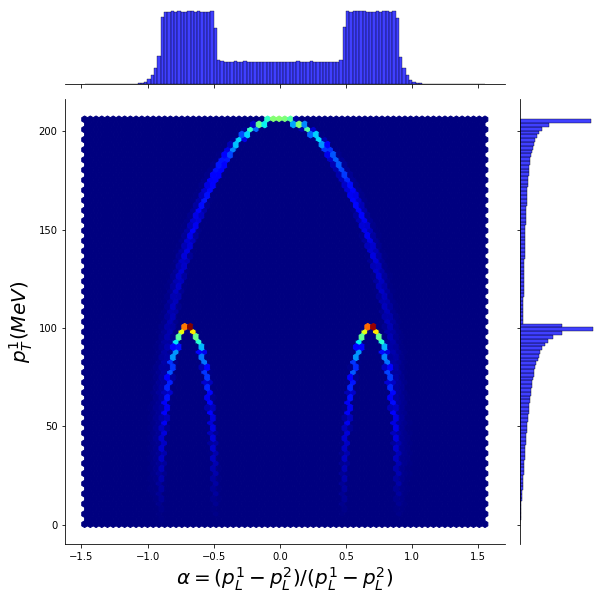

In [20]:
ax1 = sns.jointplot(x=data1['alpha'].values, y=data1['p1T'].values, kind='hex',height=8,cmap='jet',color='b',gridsize=70)
ax1.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
ax1.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)

En este punto es evidente que el código funciona, con esto claro se procedió a añadir el smearing a los datos, esto simplemente debería afectar la resolución de la gráfica.

### Paso 10 - Smearing con distribución gaussiana:

En este paso se analizó la distorsión sobre $\theta$, $\phi$ y $E$ de cada una de las particulas medidas, con el objetivo de calcular la distorsión en el vector de cuadrimomento, también llamado smearing. La distorsión de la energía, el ángulo polar y el ángulo azimutal se calculan como una distribución gaussiana con media igual al $E$, $\theta$ y $\phi$ de la particula, respectivamente. 

### Paso 11 - Corrección en los momentos:

Utilizando la distorsión planteada en el paso anterior se obtuvieron los valores $E^{obs}$, $\theta^{obs}$ y $\phi^{obs}$. Posteriormente se cálculo el momento observado utilizando la formula de Einstein

$$p^{obs}=\sqrt{(E^{obs})^2-(m)^2}$$

Estos últimos dos pasos se resumieron en la siguiente función de python:

In [21]:
# Funcion que corrige los valores de E, p y theta mediante
# una distribusion gaussiana

def corregir(E, m, sigma_E, theta, sigma_theta, phi, sigma_phi):
    E_corregida = np.random.normal(E, abs(sigma_E*E))
    theta_corregido = np.random.normal(theta, abs(sigma_theta*theta))
    phi_corregido = np.random.normal(phi, abs(sigma_phi*phi))
    p_corregido = 0
    if E_corregida**2 - m**2>0:
        p_corregido = np.sqrt(E_corregida**2 - m**2)
    return E_corregida, theta_corregido, p_corregido, phi_corregido

Asimismo, se pueden calcular las componentes x, y y z del momento como

$$p_{i,x}^{obs} = p_{i}^{obs} \cos{(\theta^{obs})}$$
$$p_{i,y}^{obs} = p_{i}^{obs}\sin{(\theta^{obs})}\cos{(\phi^{obs})}$$
$$p_{i,z}^{obs} = p_{i}^{obs}\sin{(\theta^{obs})}\sin{(\phi^{obs})}$$

Con $i = 1,2$.

Los resultados se muestran a continuación

In [22]:
# Metodo que agrega el efecto del detector a las particulas del laboratorio
# dados los vectores energia momento  que tiene el sistema sin distorsion
# y el numero de eventos de cada tipo de desintegracion que hay
def agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,vec_e_p_lab_p1,theta_lab_p1, phi_lab_p1,vec_e_p_lab_p2,
                            theta_lab_p2,phi_lab_p2, sigmas=[0.15, 0.15, 0.15], graf_k=False, graf_lambda=False):
    sigma_E, sigma_theta, sigma_phi = sigmas[0], sigmas[1], sigmas[2]
    # Vectores donde se almaceran los resultados
    vec_e_p_lab_p1_corregido = []
    vec_e_p_lab_p2_corregido = []
    n = n_k + n_lambda + n_anti_lambda
    rango = range(n_k) if graf_k else range(n_k, n_k+n_anti_lambda+n_lambda) if graf_lambda else range(n)
    for i in rango:
        # Calculamos la masa de las dos particulas hijas dependiendo de la
        # colision que se este evaluando
        # Consideramos el caso en que solo queremos graficar para K
        mP1 = mPI if i<n_k else mP if i<n_k+n_anti_lambda else mPI
        mP2 = mPI if i<n_k else mPI if i<n_k+n_anti_lambda else mP
        
        # Se obtienen la energia, theta y phi de la particula 1 para
        # realizar la correccion
        E_p1_lab = vec_e_p_lab_p1[i,0]
        theta_p1 = theta_lab_p1[i]
        phi_p1 = phi_lab_p1[i]
        E_p1_corregida, theta_p1_corregido, p_p1_corregido, phi_p1_corregido = corregir(E_p1_lab, mP1, sigma_E, theta_p1, sigma_theta, phi_p1, sigma_phi)

        # Se obtienen la energia, theta y phi de la particula 2 para
        # realizar la correccion 
        E_p2_lab = vec_e_p_lab_p2[i,0]
        theta_p2 = theta_lab_p2[i]
        phi_p2 = phi_lab_p2[i]
        E_p2_corregida, theta_p2_corregido, p_p2_corregido, phi_p2_corregido = corregir(E_p2_lab, mP2, sigma_E, theta_p2, sigma_theta, phi_p2, sigma_phi)

        # Si el momento 1 o 2 es imaginario, se descarta
        if(p_p1_corregido == 0 or p_p2_corregido == 0):
            continue
        p1_x_corr, p1_y_corr, p1_z_corr = componentes_p(p_p1_corregido, theta_p1_corregido, phi_p1_corregido)
        vec_e_p_lab_p1_corregido.append([E_p1_lab,p1_x_corr, p1_y_corr, p1_z_corr])
        p2_x_corr, p2_y_corr, p2_z_corr = componentes_p(p_p2_corregido, theta_p2_corregido, phi_p2_corregido)
        vec_e_p_lab_p2_corregido.append([E_p2_lab,p2_x_corr, p2_y_corr, p2_z_corr])
      
    return np.array(vec_e_p_lab_p1_corregido), np.array(vec_e_p_lab_p2_corregido)

### Paso 12 - Componentes longitudinales y transversales:

En este paso se definió el factor $\alpha$ de cada particula, el momento transversal $p_T$ y el momento $p_L$ mediante las siguientes ecuaciones:

$$\alpha = \frac{p_{1_L}^{obs} - p_{2_L}^{obs}}{p_{1_L}^{obs} + p_{2_L}^{obs}}$$


$$p_T^{obs} = \sqrt{p_{y,obs}^2 + p_{z,obs}^2}$$

$$p_L^{obs} = p_x^{obs} $$

Esto se resume en la siguiente función de python y se usa al realizar el gráfico de armenteros.

In [23]:
# Metodo que dado los vectores energia momento de las particuas
# 1 y 2, calcula el factor alpha y el momento transversal
def p_transverso_alfa(vec_e_p_lab_p1, vec_e_p_lab_p2):
    p_L_1_lab = vec_e_p_lab_p1[:,1]
    p_L_2_lab = vec_e_p_lab_p2[:,1]
    p_T_1_lab = np.sqrt(vec_e_p_lab_p1[:,2]**2 + vec_e_p_lab_p1[:,3]**2)
    p_T_2_lab = np.sqrt(vec_e_p_lab_p2[:,2]**2 + vec_e_p_lab_p2[:,3]**2)
    
    alpha = (p_L_1_lab - p_L_2_lab)/(p_L_1_lab + p_L_2_lab)
    return p_T_1_lab, p_T_2_lab, alpha

### Paso 13 - Ángulo entre los productos de decaimiento:

En este paso se definió la función de python que permite calcular el ángulo $\theta_{12} entre los dos productos de decaimiento. Para esto se útilizo la analizó ecuación:

$$\cos \left(\theta_{12}\right)=\left(\cfrac{p_{1 x}^{o b s} p_{2 }x^{o b s}+p_{1 y}^{o b s} p_{2 y}^{o b s}+p_{1 z}^{o b s} p_{2 z}^{o b s}}{\left|\vec{p}_{1}^{o b s}\right|\left|\vec{p}_{2}^{o b s}\right|}\right)$$

por lo que al despejar $\theta_{12}$, este queda dado de la siguiente forma:

$$\theta_{12}= \cos^{-1}=\left(\cfrac{p_{1 x}^{o b s} p_{2 }x^{o b s}+p_{1 y}^{o b s} p_{2 y}^{o b s}+p_{1 z}^{o b s} p_{2 z}^{o b s}}{\left|\vec{p}_{1}^{o b s}\right|\left|\vec{p}_{2}^{o b s}\right|}\right)$$

In [24]:
def theta_12(vec_ep_p1, vec_ep_p2):
    p1x = vec_ep_p1[:,1]
    p1y = vec_ep_p1[:,2]
    p1z = vec_ep_p1[:,3]
    p2x = vec_ep_p2[:,1]
    p2y = vec_ep_p2[:,2]
    p2z = vec_ep_p2[:,3]
    
    normap1 = np.sqrt(p1x**2 + p1y**2 + p1z**2)
    normap2 = np.sqrt(p2x**2 + p2y**2 + p2z**2)
    return np.arccos((p1x*p2x + p1y*p2y + p1z*p2z)/(normap1*normap2))

### Paso 14 - Determinando masa invariante relativista

En este paso se analizó la masa como el invariante relativista:

$$ M^{2} = E^{2} + \vec{P}^{2}$$

Luego, por conservación de la energía $ E = E_{1} + E_{2} $ y $\vec{P} = \vec{P_{1}} + \vec{P_{2}}$

Por lo que útlizando las magnitudes observadas se puede reconstruir la masa de la partícula que decayó mediante la siguiente ecuación:

$$ M^{obs} = \sqrt{ \left(E_{1}^{obs} + E_{2}^{obs} \right)^{2} + \left(\vec{P_{1}}^{obs} + \vec{P_{2}}^{obs} \right)^{2}}$$





In [25]:
def M_rec(vec_ep_p1, vec_ep_p2):
    e_p1 = vec_ep_p1[:,0]
    p1x = vec_ep_p1[:,1]
    p1y = vec_ep_p1[:,2]
    p1z = vec_ep_p1[:,3]
    
    e_p2 = vec_ep_p2[:,0]
    p2x = vec_ep_p2[:,1]
    p2y = vec_ep_p2[:,2]
    p2z = vec_ep_p2[:,3]
    
    psuma_x = p1x + p2x
    psuma_y = p1y + p2y
    psuma_z = p1z + p2z
    
    psuma = psuma_x**2 + psuma_y**2 + psuma_z**2
    return np.sqrt((e_p1 + e_p2)**2 - psuma)

### Paso 15 - Simulación

En este punto utilizamos las funciones de python definidas en los pasos anteriores para realizar el gráfico de armenteros.

Para esto, calculamos los vectores de cuadrumomento corregido, esto se ve en la siguiente linea de código:

In [26]:
# Vectores de cuadrumomento corregido
vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2)

Posteriormente, se llamó a la funcion p_transverso_alfa para obtener el momento transversal $p_{T}$ y el valor de $\alpha$ de cada una de las particulas:

In [27]:
# Se llama a la funcion para obtener los momentos tranversos y el valor alpha de cada una de las particulas
p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido)

Finalmente, se creó el diccionario con los datos para poder graficar:

In [28]:
# Crear el diccionario para la grafica
diccionario2 = {'p1T': p_T_1_corregido, 'alpha': alpha_corregido}
data2 = pd.DataFrame(data = diccionario2)

Text(45.125, 0.5, '$p_{T}^{1} (MeV)$')

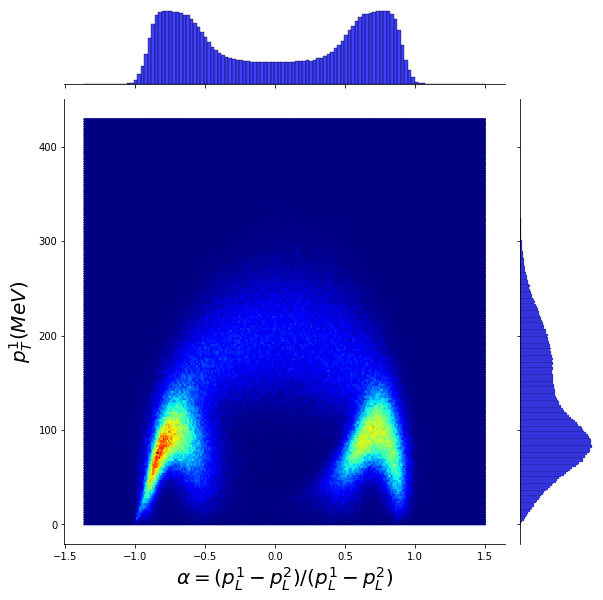

In [29]:
ax2 = sns.jointplot(x=data2['alpha'].values, y=data2['p1T'].values, kind='hex',height=8,cmap='jet',color='b',gridsize=300)
ax2.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
ax2.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)

Con esto se procedió a comparar la gráfica sin smearing con la gráfica con smearing, para analizar sus diferencias:

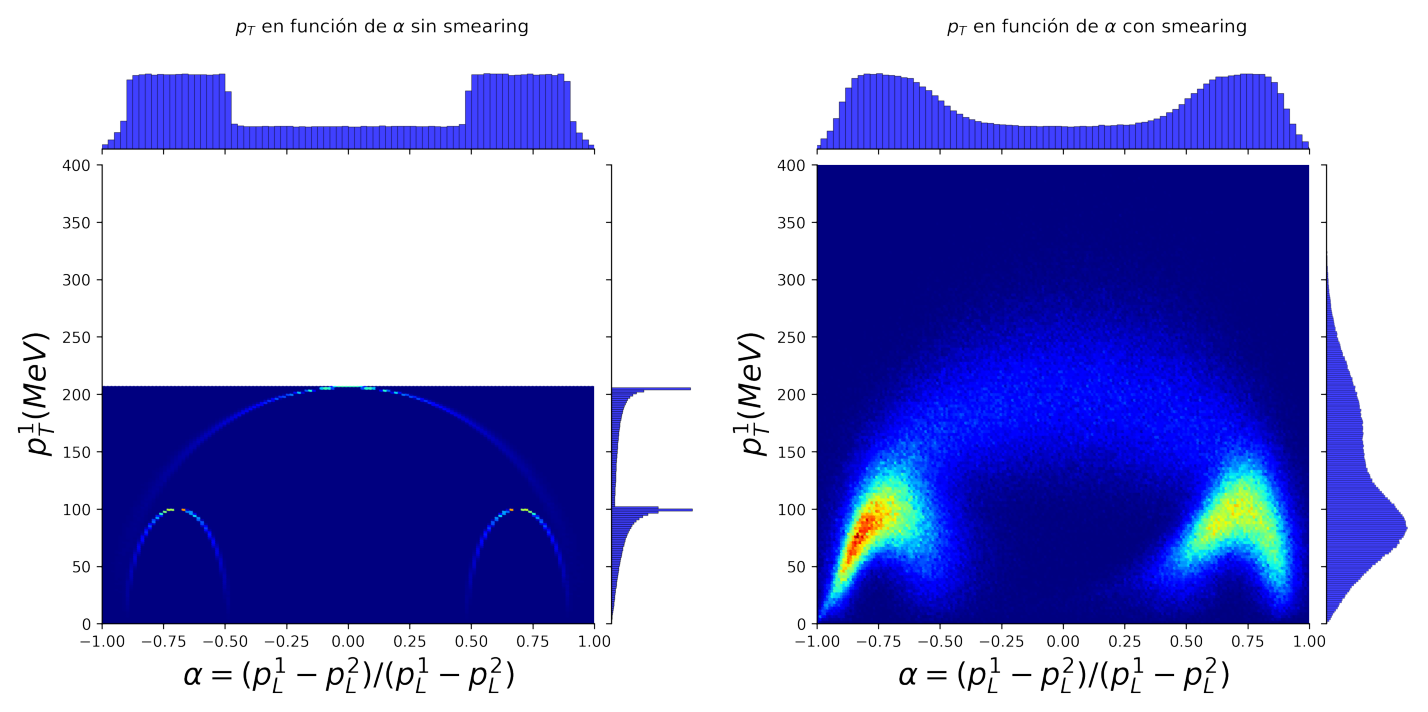

In [30]:
no_smearing = sns.jointplot(x=data1['alpha'].values, y=data1['p1T'].values, kind='hex',height=6,cmap='jet',color='b',gridsize=200)
no_smearing.fig.subplots_adjust(top=.9)
no_smearing.fig.suptitle(r'$p_T$ en función de $\alpha$ sin smearing')
smearing = sns.jointplot(x=data2['alpha'].values, y=data2['p1T'].values, kind='hex',height=6,cmap='jet',color='b',gridsize=300)
smearing.fig.subplots_adjust(top=.9)
smearing.fig.suptitle(r'$p_T$ en función de $\alpha$ con smearing')

smearing.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
smearing.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)

no_smearing.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
no_smearing.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
smearing.ax_joint.set_ylim((0,400))
no_smearing.ax_joint.set_ylim((0,400))
smearing.ax_joint.set_xlim((-1,1))
no_smearing.ax_joint.set_xlim((-1,1))

## Guardamos las imagenes
no_smearing.savefig('no_smearing.png', dpi=300, bbox_inches='tight')
smearing.savefig('smearing.png', dpi=300, bbox_inches='tight')
plt.close(no_smearing.fig)
plt.close(smearing.fig)
## Las visualizamos con matplotlib
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('no_smearing.png'))
axarr[1].imshow(mpimg.imread('smearing.png'))
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

A primera vista, es claro que el código funciona y el smearing distorsiona los datos. 

En lo restante del informe se profundizará sobre la importancia del smearing desde diferentes puntos de vista.

## Punto 8
Ahora, nos interesa explorar más a fondo el plot de Armenteros y sus implicaciones. A continuación, los puntos que consideramos.

### Variación del plot de Armenteros en función del smearing.
Aquí, exploramos algunas implicaciones sobre la forma en que varía el plot de Armenteros en función del smearing. Para ello, consideramos 4 variaciones en smearing: una para la energía, otra para el ángulo polar ($\theta$), otra para el azimutal ($\phi$), y otra en que considerábamos las variaciones en las tres variables: energía y ambos ángulos. 

Para ello, definimos unos rangos de smearing entre 0.001 y 0.2, probando con condiciones experimentales muy buenas, y otras condiciones peores a las que se tienen actualmente. No usamos valores de smearing más grandes porque, para ellos, el plot de Armenteros no se visualiza correctamente.

En la celda a continuación, podemos ver la definición de los vectores de smearing para energía y ángulos. Probamos con 20 valores distintos, distribuidos igualmente entre el rango definido.


In [31]:
vals_sigma_E = np.linspace(0.001, 0.2, 20)
vals_sigma_phi = np.linspace(0.001, 0.2, 20)
vals_sigma_theta = np.linspace(0.001, 0.2, 20)

#### Variación del smearing en energía
A continuación, se crea la carpeta donde se almacenarán las figuras y el código realizado usando diferentes valores de smearing para la energía entre 0.001 y 0.2, manteniendo constante el smearing del enunciado para $\phi$ y $\theta$ en 0.1.

In [32]:
try:
    os.mkdir('smearing_E')
except:
    pass

In [33]:
for i in range(0, len(vals_sigma_E)):
    sigmas = [vals_sigma_E[i], 0.1, 0.1]
    vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2, sigmas)
    p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, 
                                                                          vec_e_p_lab_p2_corregido)
    diccionario = {'p1T': p_T_1_corregido, 'alpha': alpha_corregido}
    data = pd.DataFrame(data = diccionario)
    plot = sns.jointplot(x=data['alpha'].values, y=data['p1T'].values, kind='hex',height=6,
                  cmap='jet',color='b',gridsize=300)
    plot.fig.subplots_adjust(top=.9)
    plot.fig.suptitle(r'Smearing $\Delta$ E = {:.3f}'.format(sigmas[0]))
    plot.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
    plot.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
    plot.ax_joint.set_xlim((-1,1))
    plot.ax_joint.set_ylim((0,400))
    plt.savefig('smearing_E/smearing_E_{}.jpg'.format(i+1), dpi=300, bbox_inches='tight')
    plt.close(plot.fig)
    

Para visualizar un video de los resultados obtenidos variando el smearing, remítase al link de <a href="https://youtu.be/lnLOTktrxg8">Youtube</a>. Asimismo, a continuación se presenta la evolución de las gráficas con el smearing.

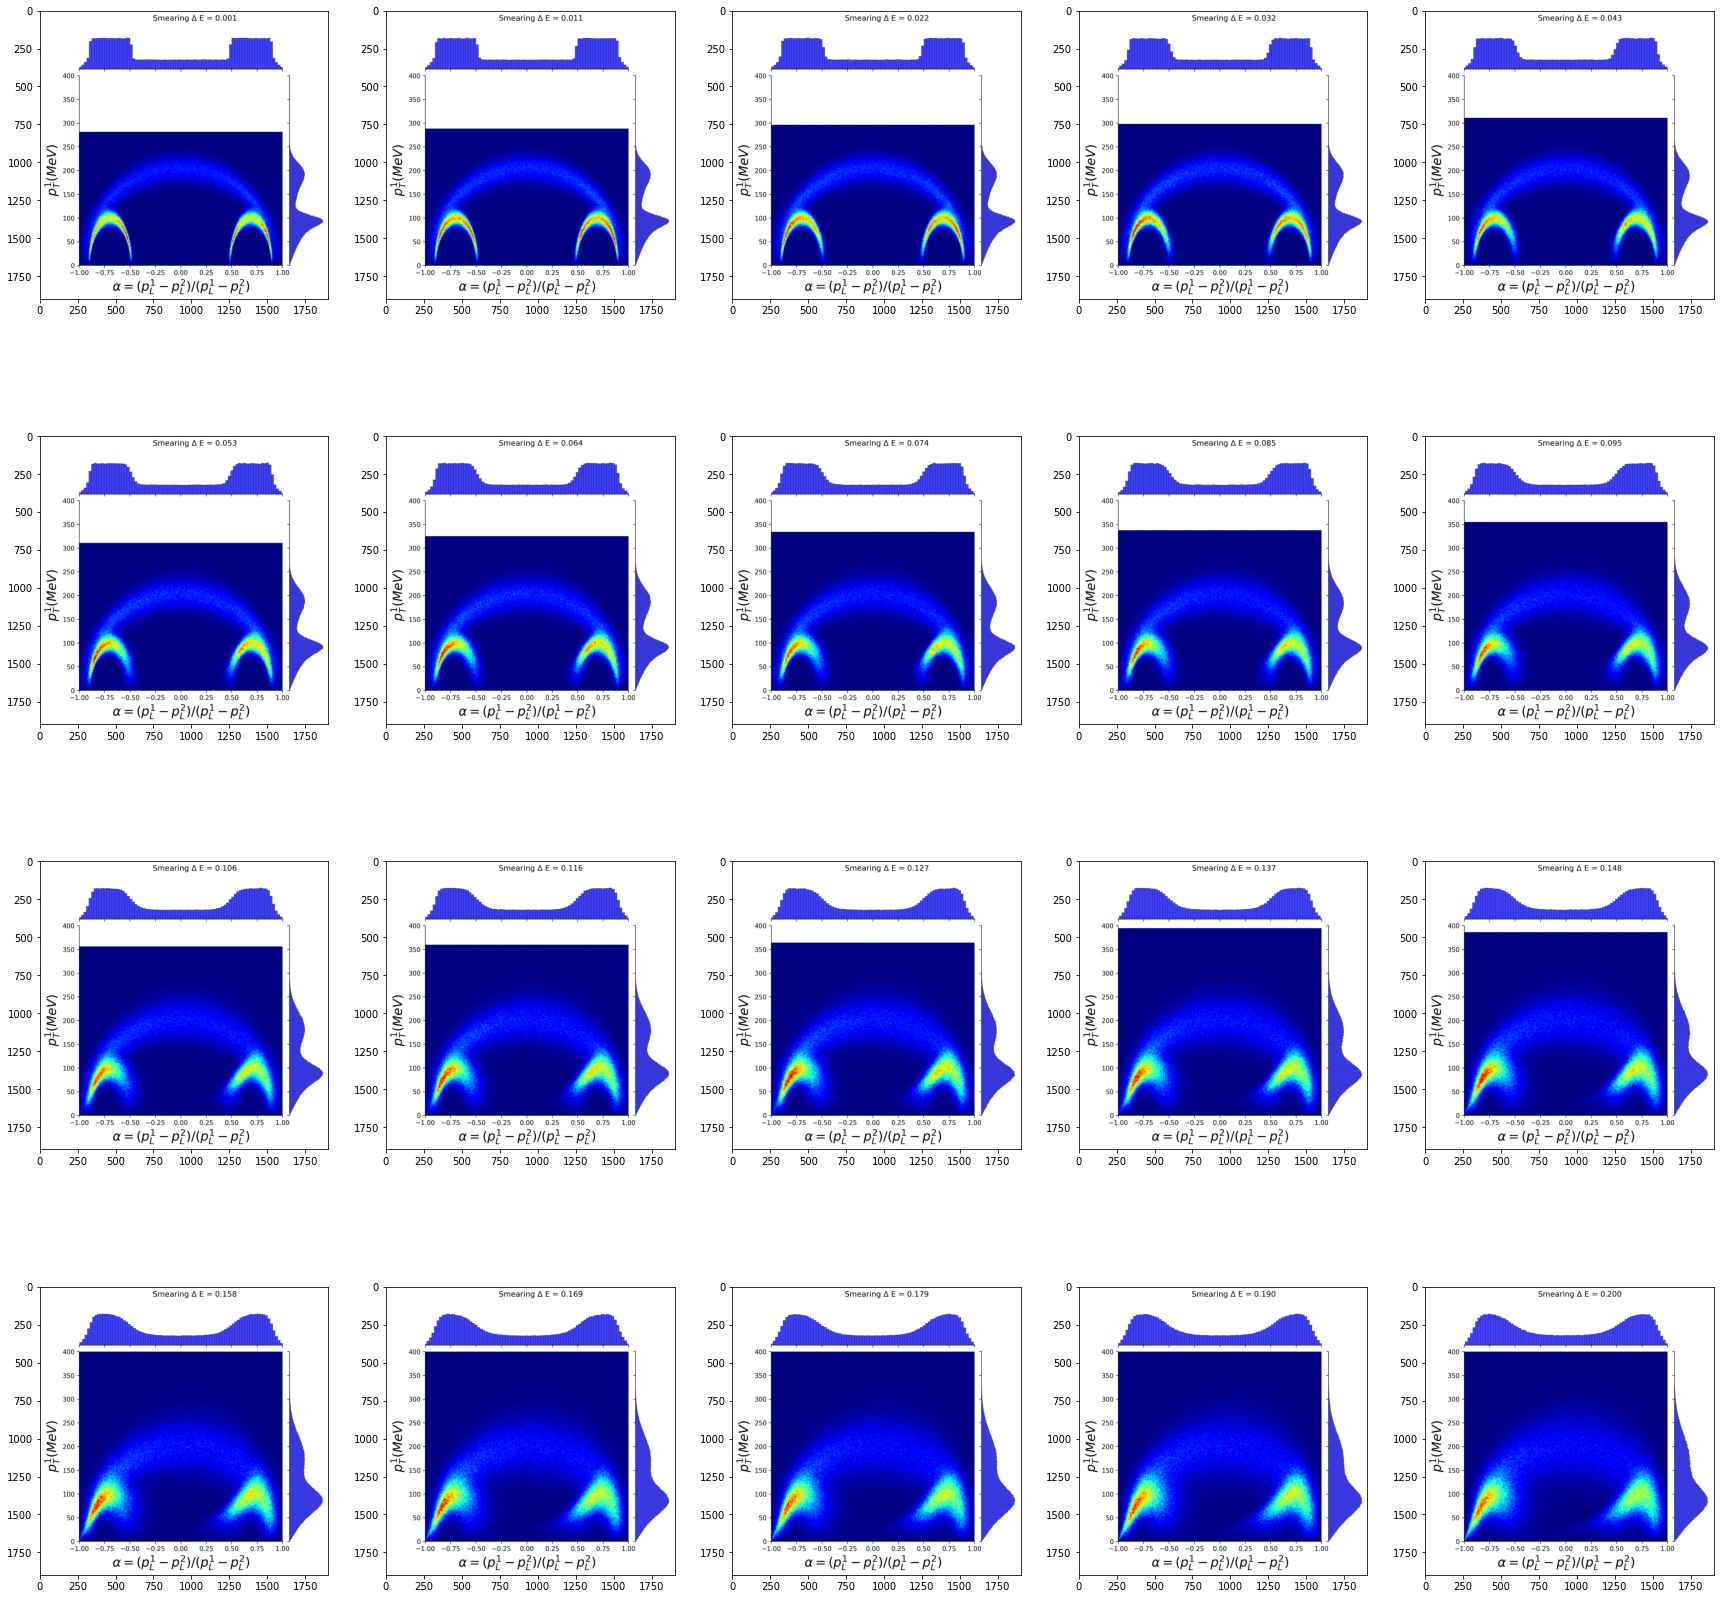

In [34]:
f, ax = plt.subplots(4,5, figsize=(30,30))
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(mpimg.imread('smearing_E/smearing_E_{}.jpg'.format(k+1)))
        k += 1

Podemos ver que, a medida que incrementa el smearing, la gráfica pierde resolución. Esto se debe a que, al tener una mayor incertidumbre en la medición de la energía, el cálculo de los momentos se ve afectado también, tal que el rango de $p_T$ varía. En este caso, determinar con exactidud el momento transversal de una partícula se dificulta, pues desde el comienzo se tiene una posible variación en la energía. De esta forma, incrementa la incertidumbre en la eía nergy, por tanto, disminuye la resolución de la gráfica.

### Variación del smearing en la componente polar
A continuación, se crea la carpeta donde se almacenarán las figuras y el código realizado usando diferentes valores de smearing para la componente polar, $\phi$, entre 0.001 y 0.2, manteniendo constante el smearing del enunciado para la energía y $\theta$ en 0.1.

In [35]:
try:
    os.mkdir('smearing_phi')
except:
    pass

In [36]:
for i in range(0, len(vals_sigma_phi)):
    sigmas = [0.1, vals_sigma_phi[i], 0.1]
    vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2, sigmas)
    p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, 
                                                                          vec_e_p_lab_p2_corregido)
    diccionario = {'p1T': p_T_1_corregido, 'alpha': alpha_corregido}
    data = pd.DataFrame(data = diccionario)
    plot = sns.jointplot(x=data['alpha'].values, y=data['p1T'].values, kind='hex',height=6,
                  cmap='jet',color='b',gridsize=300)
    plot.fig.subplots_adjust(top=.9)
    plot.fig.suptitle(r'Smearing $\Delta\; \phi$ = {:.3f}'.format(sigmas[1]))
    plot.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
    plot.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
    plot.ax_joint.set_xlim((-1,1))
    plot.ax_joint.set_ylim((0,400))
    plt.savefig('smearing_phi/smearing_phi_{}.jpg'.format(i+1), dpi=300, bbox_inches='tight')
    plt.close(plot.fig)

Para visualizar un video de los resultados obtenidos variando el smearing en la componente azimutal, remítase al link de <a href="https://youtu.be/3OS27rtcESs">Youtube</a>. Asimismo, a continuación se presenta la evolución de las gráficas con el smearing.

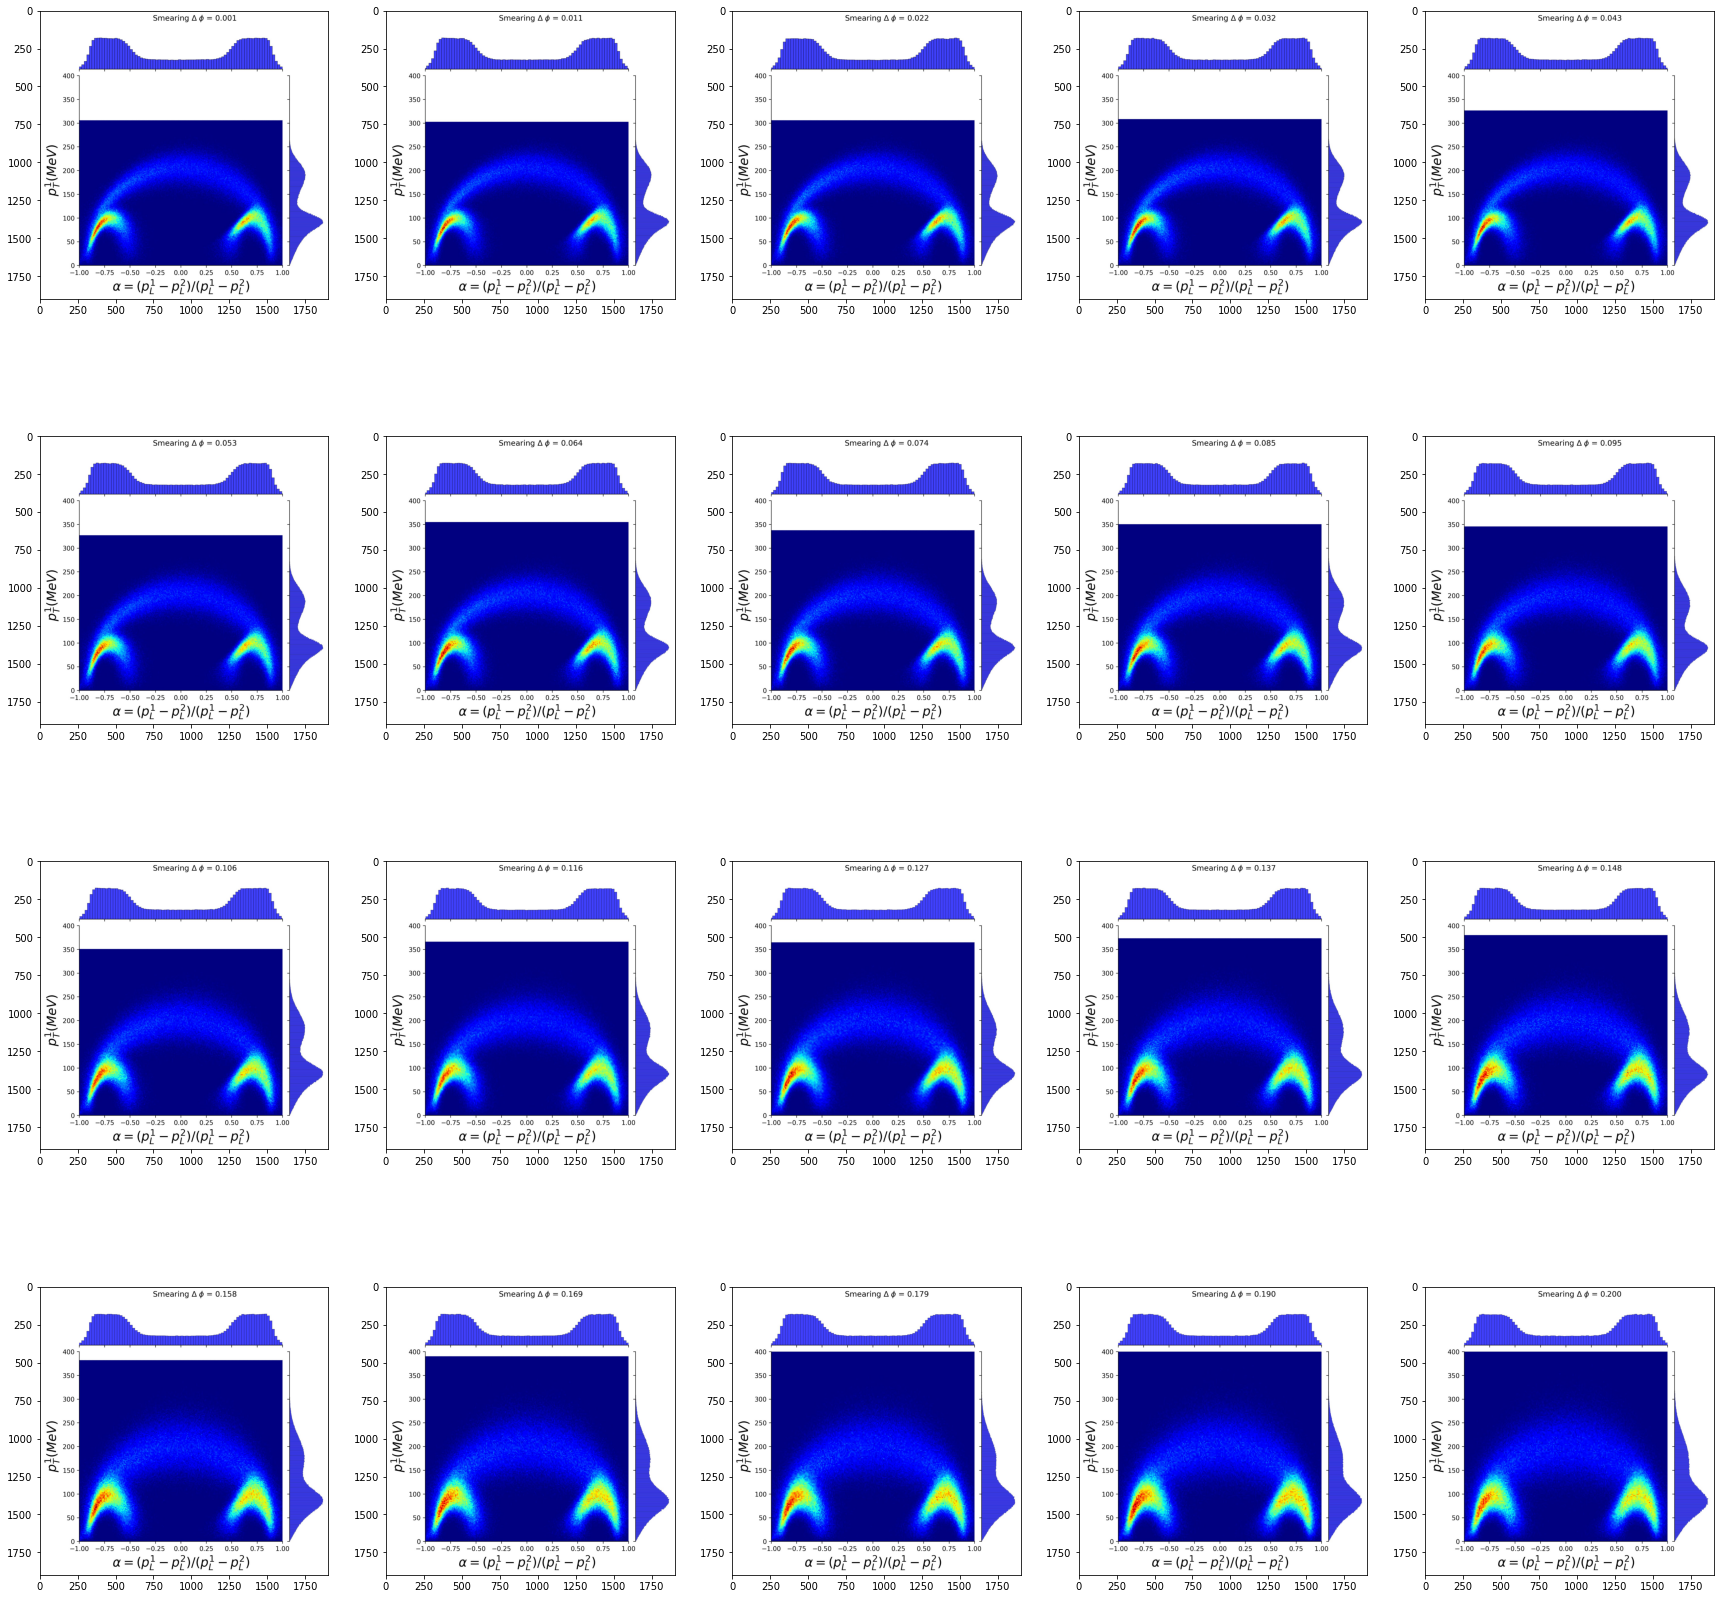

In [37]:
f, ax = plt.subplots(4,5, figsize=(30,30))
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(mpimg.imread('smearing_phi/smearing_phi_{}.jpg'.format(k+1)))
        k += 1

Al igual que en el caso anterior, podemos ver que, a medida que incrementa el smearing, la gráfica pierde resolución. Esto se debe a que, al tener una mayor incertidumbre en la medición del ángulo polar, el cálculo de los momentos se ve afectado también, tal que el rango en que ellos se presentan será ahora mayor. Por lo tanto, vemos una mayor dispersión en el momento transversal calculado, como era de esperarse.

### Variación del smearing en la componente azimutal, $\theta$
Veamos ahora la variación del smearing en la componente azimutal. A continuación, se crea la carpeta donde se almacenarán las figuras y el código realizado usando diferentes valores de smearing para la energía entre 0.001 y 0.2, manteniendo constante el smearing del enunciado para $\phi$ y la energía en 0.1,

In [38]:
try:
    os.mkdir('smearing_theta')
except:
    pass

In [39]:
for i in range(0, len(vals_sigma_theta)):
    sigmas = [0.1, 0.1, vals_sigma_theta[i]]
    vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2, sigmas)
    p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, 
                                                                          vec_e_p_lab_p2_corregido)
    diccionario = {'p1T': p_T_1_corregido, 'alpha': alpha_corregido}
    data = pd.DataFrame(data = diccionario)
    plot = sns.jointplot(x=data['alpha'].values, y=data['p1T'].values, kind='hex',height=6,
                  cmap='jet',color='b',gridsize=300)
    plot.fig.subplots_adjust(top=.9)
    plot.fig.suptitle(r'Smearing $\Delta\; \theta$ = {:.3f}'.format(sigmas[2]))
    plot.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
    plot.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
    plot.ax_joint.set_xlim((-1,1))
    plot.ax_joint.set_ylim((0,400))
    plt.savefig('smearing_theta/smearing_theta_{}.jpg'.format(i+1), dpi=300, bbox_inches='tight')
    plt.close(plot.fig)

Para visualizar un video de los resultados obtenidos variando el smearing en la componente azimutal, remítase al link de <a href="https://youtu.be/3OS27rtcESs">Youtube</a>. Asimismo, a continuación se presenta la evolución de las gráficas con el smearing:

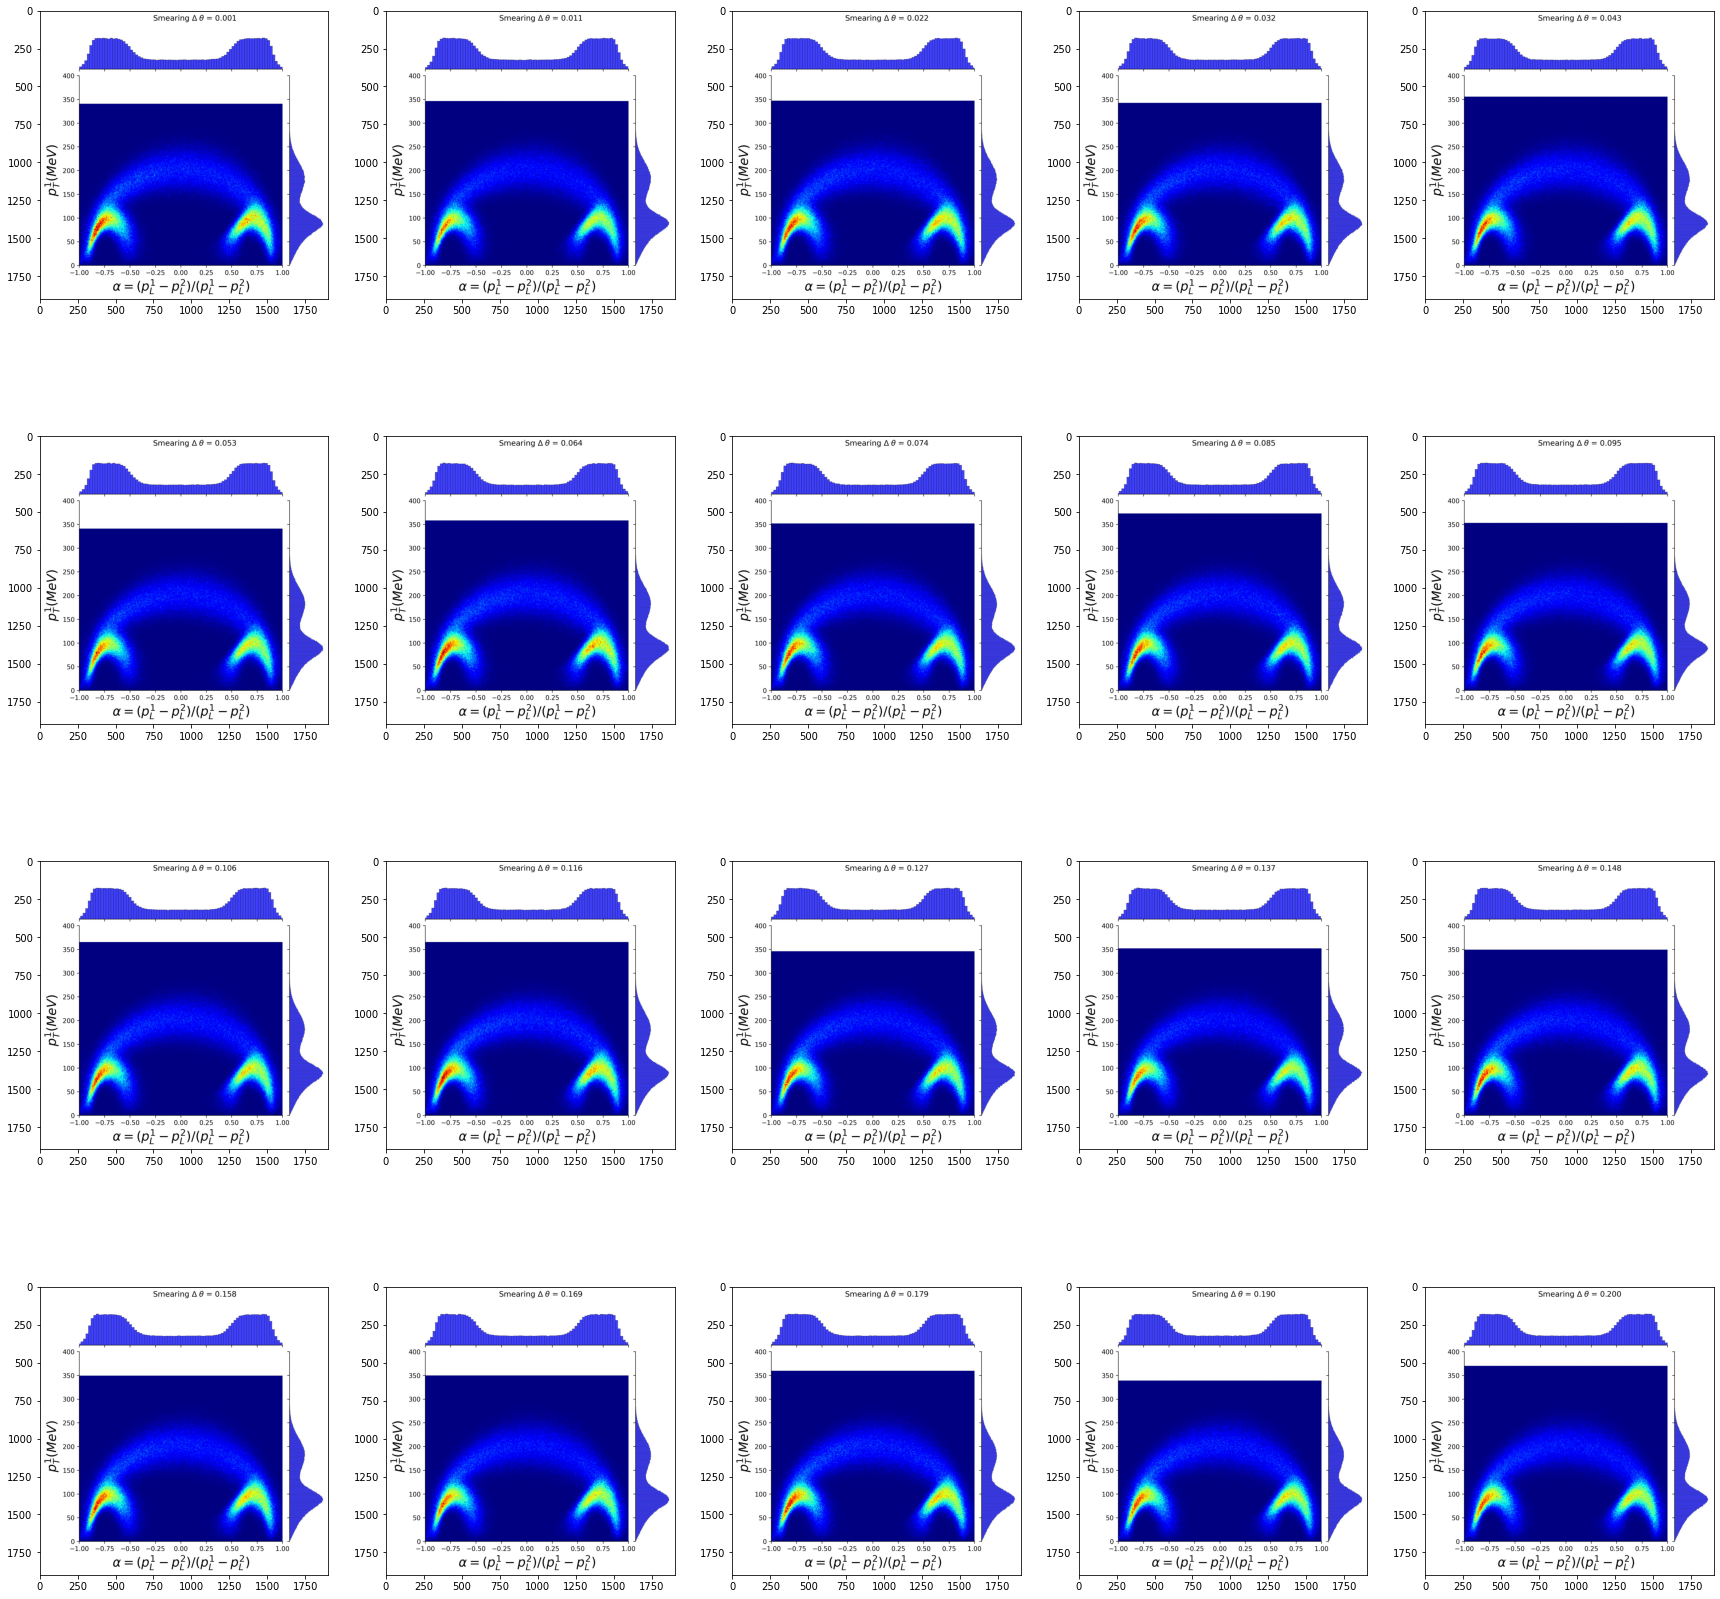

In [40]:
f, ax = plt.subplots(4,5, figsize=(30,30))
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(mpimg.imread('smearing_theta/smearing_theta_{}.jpg'.format(k+1)))
        k += 1

Como era de esperarse, el efecto es similar al de los casos anteriors. No obstante, es interesante ver que, en este punto, el smearing en el momento transversal es mucho más bajo que en el de los dos casos realizados previamente. Lo anterior, se debe a que el momento transversal se mide con respecto a las componentes y,z mientras que el ángulo azimutal lo medimos con respecto al eje x. Por lo tanto, y como se ve en las gráficas y el video, no se espera una mayor variación en esta variable (que sí ocurre en las otras variables afectadas - energía y ángulo polar -). Sin embargo, sí se puede apreciar que el smearing en el ángulo azimutal afecta, aunque de menor manera, la resolución de la gráfica.

### Variando todos los smearings simultaneamente
Finalmente, variamos todos los smearings considerados de forma simultánea, para tener un mejor instinto sobre la forma en que el smearing afecta nuestra gráfica. De la gráfica sin smearing realizada unos pasos atrás, tenemos que esta tiene mejor definición. Por lo tanto, entre menores sean los smearings, esperamos mayor resolución.

In [41]:
try:
    os.mkdir('smearing_todos')
except:
    pass

In [42]:
for i in range(0, len(vals_sigma_theta)):
    sigmas = [vals_sigma_E[i], vals_sigma_phi[i], vals_sigma_theta[i]]
    vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2, sigmas)
    p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, 
                                                                          vec_e_p_lab_p2_corregido)
    diccionario = {'p1T': p_T_1_corregido, 'alpha': alpha_corregido}
    data = pd.DataFrame(data = diccionario)
    plot = sns.jointplot(x=data['alpha'].values, y=data['p1T'].values, kind='hex',height=6,
                  cmap='jet',color='b',gridsize=300)
    plot.fig.subplots_adjust(top=.9)
    plot.fig.suptitle(r'Smearing $\Delta\; \theta = \Delta\; \phi = \Delta\; E $ = {:.3f}'.format(sigmas[0]))
    plot.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
    plot.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
    plot.ax_joint.set_xlim((-1,1))
    plot.ax_joint.set_ylim((0,400))
    plt.savefig('smearing_todos/smearing_todos_{}.jpg'.format(i+1), dpi=300, bbox_inches='tight')
    plt.close(plot.fig)

Para visualizar un video de los resultados obtenidos variando el smearing, remítase al link de <a href="https://youtu.be/YObjZRDe6Fc">youtube</a>. Asimismo, a continuación se presenta la evolución de las gráficas con el smearing.


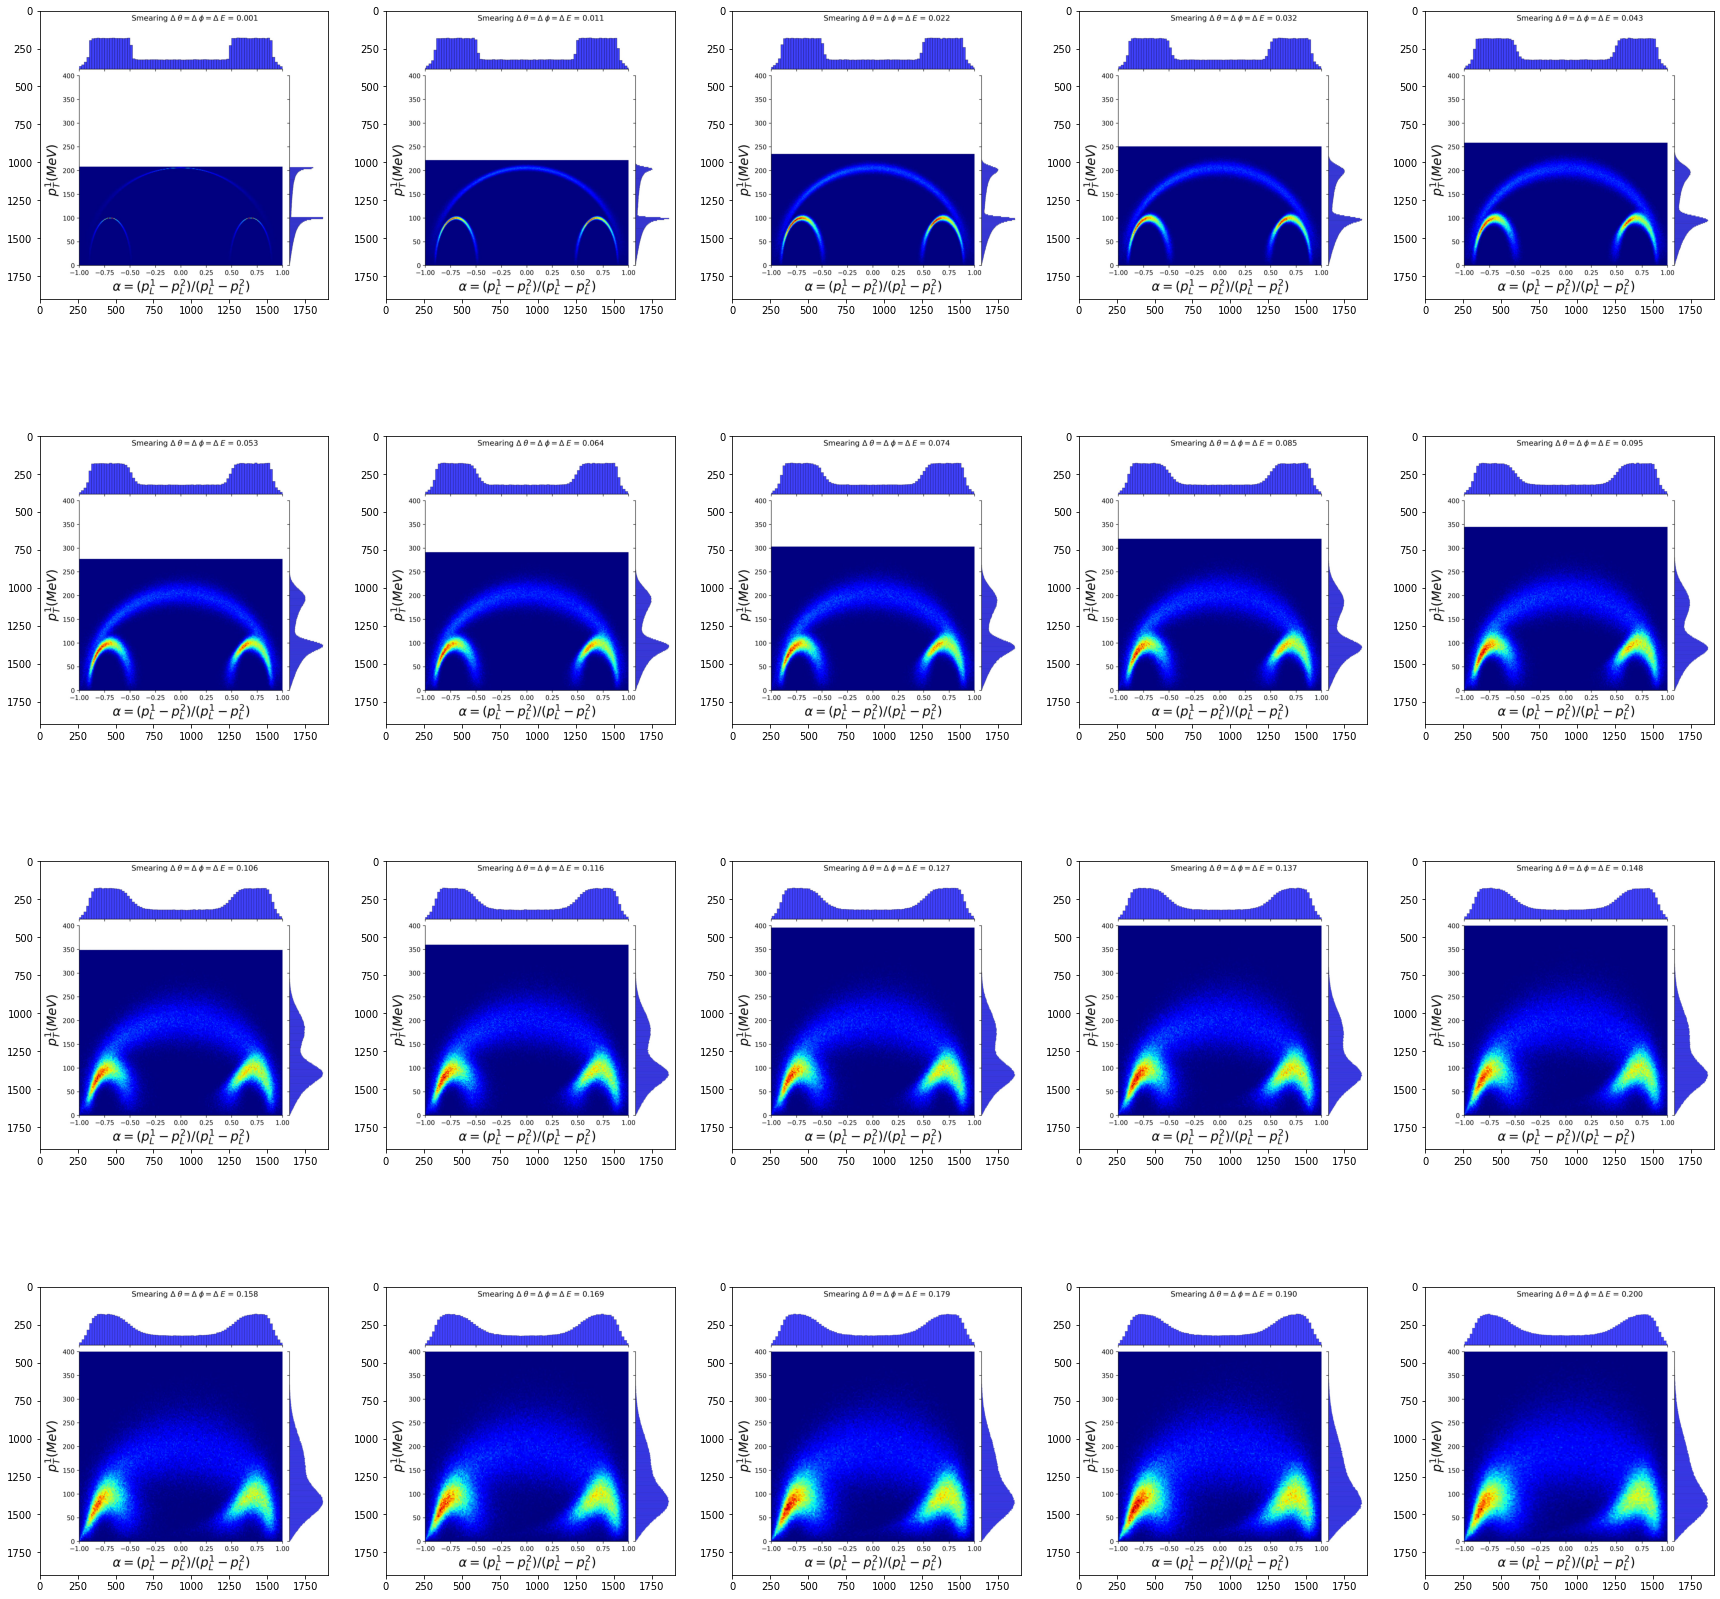

In [67]:
f, ax = plt.subplots(4,5, figsize=(30,30))
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(mpimg.imread('smearing_todos/smearing_todos_{}.jpg'.format(k+1)))
        k += 1

Entre los casos anteriores, esta es la que mejor elucida el efecto del smearing. Note que, cuando los tres smearings son pequeños, tenemos una mejor resolución de las partículas. De la misma forma, el efecto de baja resolución es maximal para los smearings más pequeños.

### Variación del plot de Armenteros al intercambiar para el eje vertical los productos de decaimiento
Como se ha visto, todo el análisis previo se realizó usando el producto de decaimiento 1. Veamos ahora qué sucede utilizando el producto de decaimiento 2.

In [43]:
vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2)
p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, 
                                                                          vec_e_p_lab_p2_corregido)

In [44]:
diccionario2_int = {'p1T':  p_T_1_corregido, 'p2T': p_T_2_corregido, 'alpha': alpha_corregido}
data2_int = pd.DataFrame(data = diccionario2_int)

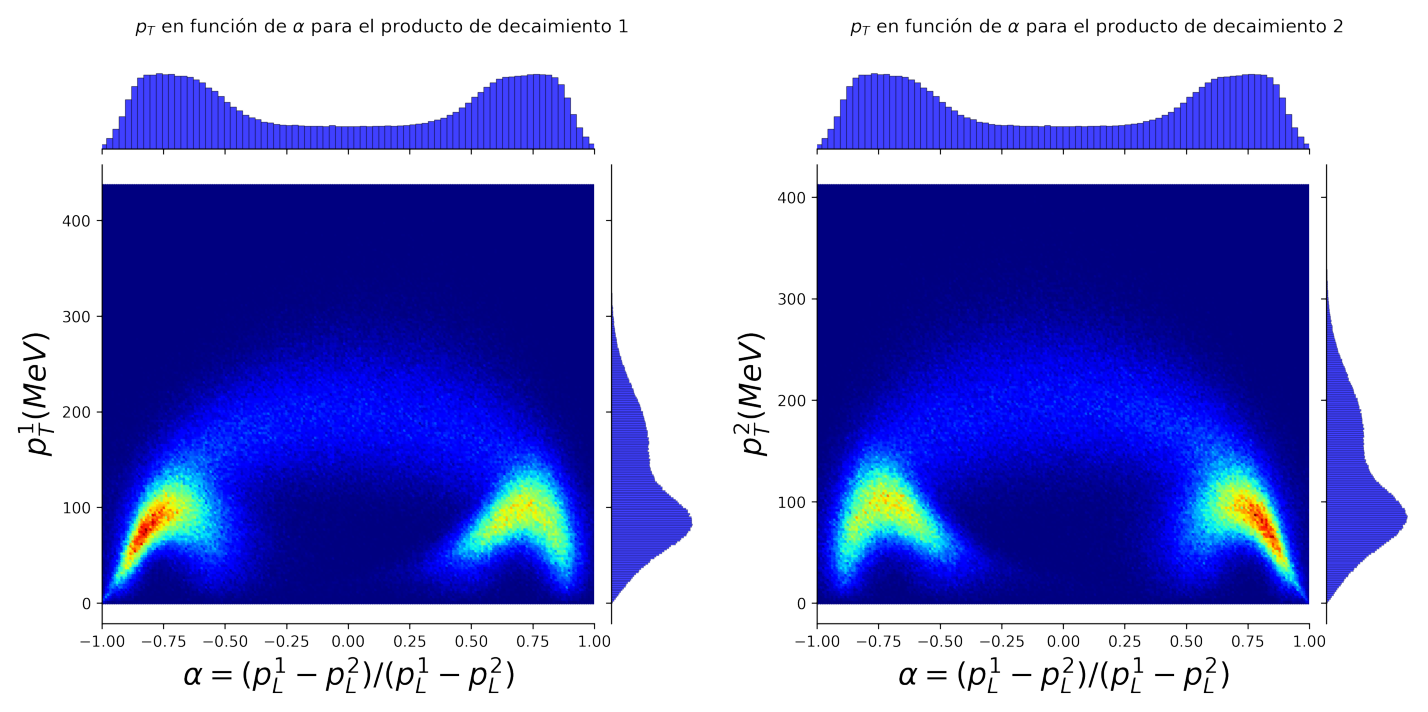

In [45]:
fig_p2 = sns.jointplot(x=data2_int['alpha'].values, y=data2_int['p2T'].values, kind='hex',height=6,cmap='jet',color='b',gridsize=300)
fig_p2.fig.subplots_adjust(top=.9)
fig_p2.fig.suptitle(r'$p_T$ en función de $\alpha$ para el producto de decaimiento 2')
fig_p1 = sns.jointplot(x=data2_int['alpha'].values, y=data2_int['p1T'].values, kind='hex',height=6,cmap='jet',color='b',gridsize=300)
fig_p1.fig.subplots_adjust(top=.9)
fig_p1.fig.suptitle(r'$p_T$ en función de $\alpha$ para el producto de decaimiento 1')

fig_p1.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
fig_p1.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
fig_p1.ax_joint.set_xlim((-1,1))

fig_p2.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
fig_p2.ax_joint.set_ylabel(r'$p_{T}^{2} (MeV)$', fontsize = 20)
fig_p2.ax_joint.set_xlim((-1,1))

## Guardamos las imagenes
fig_p2.savefig('pT_alpha_p2.png', dpi=300, bbox_inches='tight')
fig_p1.savefig('pT_alpha_p1.png', dpi=300, bbox_inches='tight')
plt.close(fig_p2.fig)
plt.close(fig_p1.fig)
## Las visualizamos con matplotlib
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('pT_alpha_p1.png'))
axarr[1].imshow(mpimg.imread('pT_alpha_p2.png'))
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

En la gráfica anterior, vemos las gráficas para el decaimiento 1 (izquierda) y 2 (derecha). Podemos ver que la gráfica de la derecha es un reflejo con respecto al eje vertical de la de la izquierda. Esto tiene sentido puesto que, en el eje y, graficamos $\alpha$. Como vimos algunas celdas atrás, esta cantidad se define como la diferencia entre el momento longitudinal de la particula 1 con el de la partícula 2, dividida entre la suma de ambos momentos longitudinales. En este sentido, intercambiar la partícula 1 con la partícula 2 hará que el valor de $\alpha$ sea el inverso del que se había calculado inicialmente.

Por esta razón, la gráfica obtenida es un reflejo con respecto al $\alpha$ de la inicial.

### Plot de Armenteros sólo para $K_0$
Ahora, ya hemos graficado los plots de Armenteros, pero no hemos definido cuál arco corresponde a una gráfica determinada. Para eso, veamos el siguiente código, en el cual seleccionamos únicamente los eventos correspondientes al $K_0$:

(-1.0, 1.0)

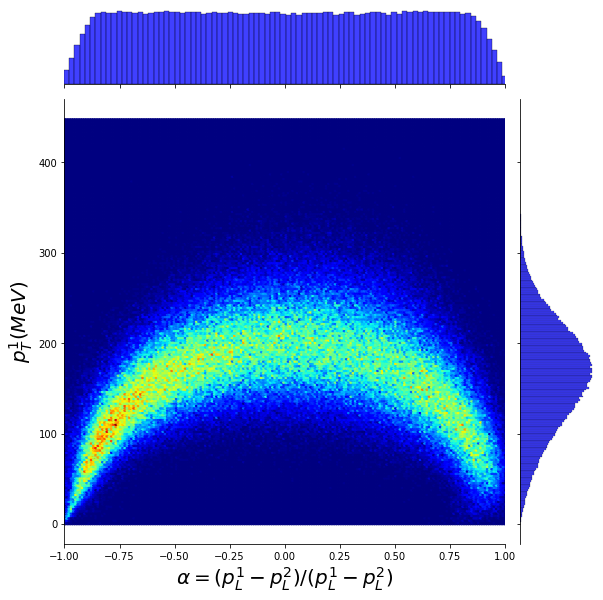

In [46]:
k_p1, k_p2 = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda, vec_e_p_lab_p1,theta_lab_p1, 
                                                                    phi_lab_p1,vec_e_p_lab_p2,
                                                                    theta_lab_p2,phi_lab_p2, 
                                                                    graf_k = True)

# Se llama a la funcion para obtener los momentos tranversos y el valor alpha de cada una de las particulas
k_p_T_1, k_p_T_2, alpha_corregido = p_transverso_alfa(k_p1, k_p2)

# Crear el diccionario para la grafica
k_diccionario2 = {'p1T': k_p_T_1, 'alpha': alpha_corregido}
k_data = pd.DataFrame(data = k_diccionario2)

plot_k = sns.jointplot(x=k_data['alpha'].values, y=k_data['p1T'].values, kind='hex',height=8,cmap='jet',color='b',gridsize=300)
plot_k.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
plot_k.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
plot_k.ax_joint.set_xlim((-1,1))

### Plot de Armenteros para $\Lambda_0$ y $\bar{\Lambda}_0$
Vemos entonces que los dos arcos pequeños son los que corresponden a $\Lambda_0$ y $\bar{\Lambda}_0$:

(-1.0, 1.0)

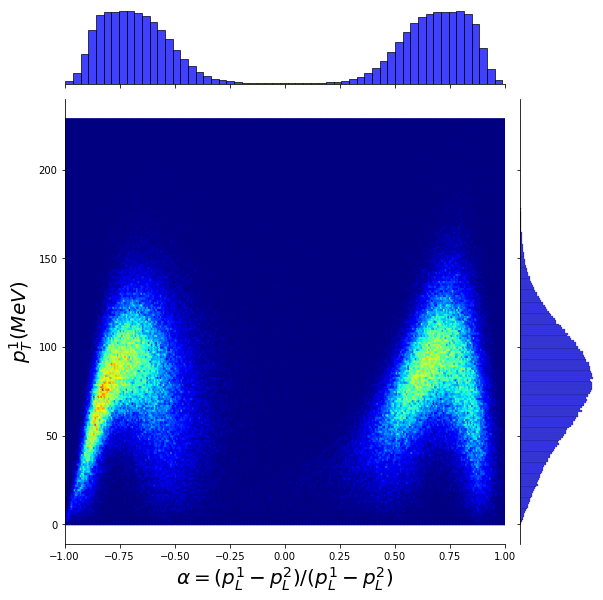

In [47]:
lambda_p1, lambda_p2 = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2, 
                                                                             graf_lambda = True)

# Se llama a la funcion para obtener los momentos tranversos y el valor alpha de cada una de las particulas
lambda_p_T_1, lambda_p_T_2, alpha_corregido = p_transverso_alfa(lambda_p1, lambda_p2)

# Crear el diccionario para la grafica
lambda_diccionario2 = {'p1T': lambda_p_T_1, 'alpha': alpha_corregido}
lambda_data = pd.DataFrame(data = lambda_diccionario2)

plot_lambda = sns.jointplot(x=lambda_data['alpha'].values, y=lambda_data['p1T'].values, kind='hex',height=8,cmap='jet',color='b',gridsize=300)
plot_lambda.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
plot_lambda.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
plot_lambda.ax_joint.set_xlim((-1,1))

### Ubicar dónde quedan los $K_0$, $\Lambda_0$ y $\bar{\Lambda}_0$

Ya que sabemos qué arco corresponde a cada partícula, podemos ubicarlo en el plot de Armenteros. Cada arco está etiquetado con su respectiva etiqueta, tal que puede distinguirse su ubicación en el plot.

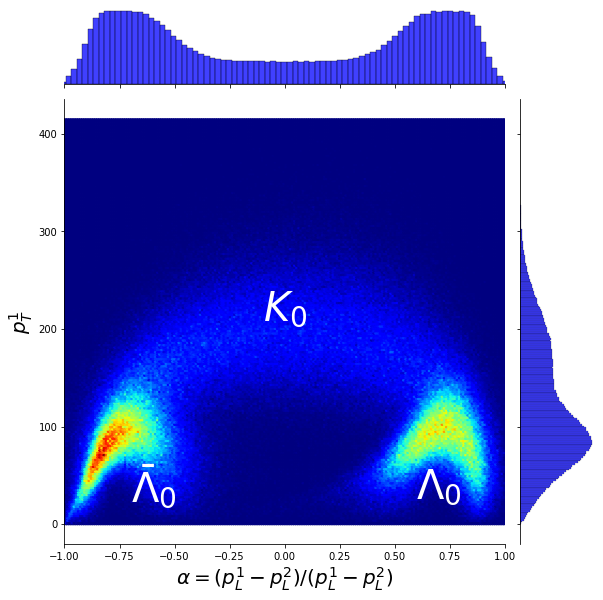

In [48]:
vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2)

# Se llama a la funcion para obtener los momentos tranversos y el valor alpha de cada una de las particulas
p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido)

# Crear el diccionario para la grafica
diccionario2 = {'p1T': p_T_1_corregido, 'alpha': alpha_corregido}
data2 = pd.DataFrame(data = diccionario2)

ax2 = sns.jointplot(x=data2['alpha'].values, y=data2['p1T'].values, kind='hex',height=8,cmap='jet',color='b',gridsize=300)

plt.text(-0.7, 38, r'$\bar{\Lambda}_0$', verticalalignment='center', c='white', size=40, weight='extra bold')

plt.text(0.7, 38, r'$\Lambda_0$', horizontalalignment='center',
         verticalalignment='center', c='white', size=40, weight='extra bold')

plt.text(0, 220, r'$K_0$', horizontalalignment='center',
         verticalalignment='center', c='white', size=40, weight='extra bold')

ax2.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
ax2.ax_joint.set_ylabel(r'$p_{T}^{1}$', fontsize = 20)
ax2.ax_joint.set_xlim((-1,1))

plt.show()

Asimismo, es de la siguiente forma que podemos distinguir cual arco asociado a cada partícula:

In [72]:
vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2)

# Se llama a la funcion para obtener los momentos tranversos y el valor alpha de cada una de las particulas
p_T_1_corregido, p_T_2_corregido, alpha_corregido = p_transverso_alfa(vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido)

pT_k0 = p_T_1_corregido[:n_k]
alpha_k0 = alpha_corregido[:n_k]
pT_lambda0 = p_T_1_corregido[n_k:]
alpha_lambda0 = alpha_corregido[n_k:]

data_k0 = pd.DataFrame(data = {'p1T': pT_k0, 'alpha': alpha_k0})
data_lambda0 = pd.DataFrame(data = {'p1T': pT_lambda0, 'alpha': alpha_lambda0})
data_anti_lambda0 = pd.DataFrame(data = {'p1T': pT_anti_lambda0, 'alpha': alpha_anti_lambda0})

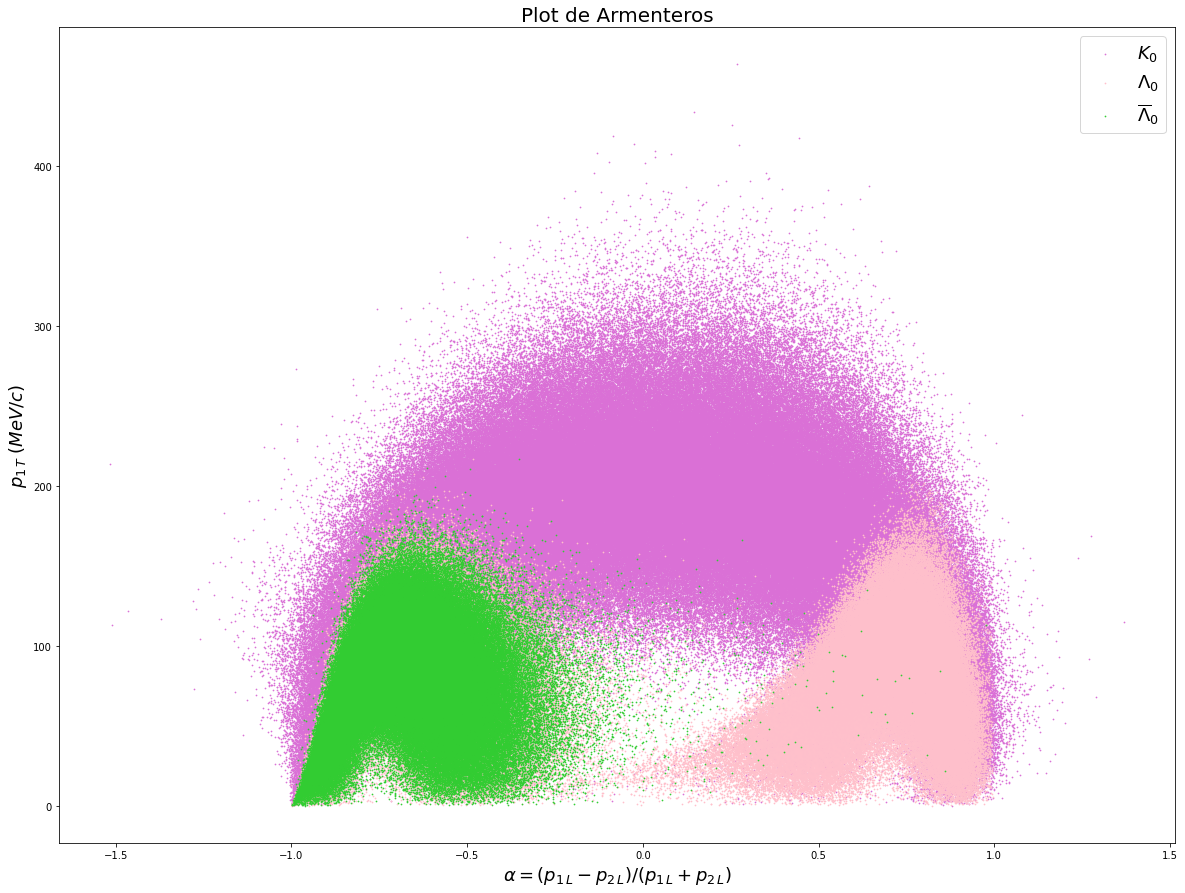

In [78]:
plt.figure(figsize=(20,15))
plt.scatter(data_k0['alpha'], data_k0['p1T'], s = 0.5, c = 'orchid', label = r'$K_0$')
plt.scatter(data_lambda0['alpha'], data_lambda0['p1T'], s = 0.5, c = 'pink', label = r'$\Lambda_0$')
plt.scatter(data_anti_lambda0['alpha'], data_anti_lambda0['p1T'], s = 0.5, c = 'limegreen', label = r'$\overline{\Lambda}_0$')
plt.title('Plot de Armenteros', fontsize = 20)
plt.xlabel(r'$\alpha = (p_{1 \, L}- p_{2 \, L})/(p_{1 \, L}+ p_{2 \, L})$', fontsize = 18)
plt.ylabel('$p_{1\,T} \; (MeV/c)$', fontsize = 18)
plt.legend(loc = 'best', fontsize = 18)
plt.show()

En la gráfica, podemos ver que las partículas $K_0$ están mostradas en morado, las $\Lambda_0$ en rosado (tal que son las de la derecha) y las $\bar{\Lambda}_0$  en verde. De esta manera, conocemos cuál es la ubicación de las partículas. Asimismo, podemos ver que la mayoría de $\Lambda_0$ se describen entre 0.25 y 1 en $\alpha$, y entre 0 y 150 en $p_T$. Por otro lado, las $\bar{\Lambda}_0$ se describen entre -1 y -0.25 en $\alpha$ y con el mismo rango en y de $\Lambda_0$. Las $K_0$ son las que describen el arco más grande. Podemos encontrar $K_0$ en todo el rango graficado, desde -1 a 1 en $\alpha$ y desde 0 hasta más de 350, para este smearing en particular. 

### ¿Puede distinguirse entre K0 y Lambdas para momento transversal pequeño de uno de los productos de decaimiento?

En principio, si desde el inicio categorizamos los datos, es posible distinguirlos debido a que tendrían una etiqueta. Sin embargo, en la realidad no es posible poner etiquetas en los datos experimentales, lo que se hace es tratar de reconstruir la masa del decaimiento. Debido a esto, decídimos intentar replicar ese procedimiento con nuestros datos simulados.

Utilizando la ecuación y función de python planteadas en el paso 14 se intentó reconstruir la masa del decaimiento para diferentes valores de smearing para valores pequeños de momento transversal, en particular nos enfocamos en un rango entre 0 y el 10% del máximo momento transversal simulado.

### Caso 1: Con el smearing de 0.1

In [49]:
lim_pT = 35

In [50]:
data2['Mrec'] = M_rec(vec_e_p_lab_p1_corregido, vec_e_p_lab_p2_corregido)
data2 = data2.dropna()
p_T_smearing = data2[data2['p1T'] <= lim_pT]

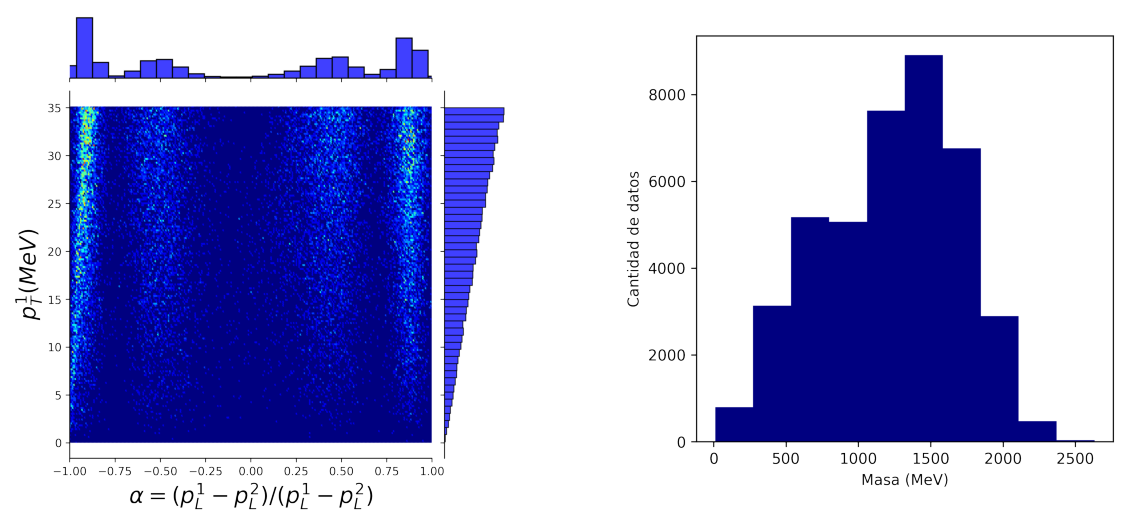

In [51]:
graf_pT_peq_smearing = sns.jointplot(x=p_T_smearing['alpha'].values, y=p_T_smearing['p1T'].values,
                                     kind='hex',height=6,cmap='jet',color='b',gridsize=300)
fig = plt.figure(figsize=(5,5))
hist_pT_peq_smearing = p_T_smearing['Mrec'].hist(color='navy')
plt.xlabel("Masa (MeV)")
plt.ylabel("Cantidad de datos")
plt.grid(0)

graf_pT_peq_smearing.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
graf_pT_peq_smearing.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
graf_pT_peq_smearing.ax_joint.set_xlim((-1,1))
graf_pT_peq_smearing.savefig('graf_pT_peq_smearing.png', dpi=300, bbox_inches='tight')


plt.savefig('hist_pT_peq_smearing.png', dpi=300, bbox_inches='tight')
plt.close(graf_pT_peq_smearing.fig)
plt.close()
## Las visualizamos con matplotlib
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('graf_pT_peq_smearing.png'))
axarr[1].imshow(mpimg.imread('hist_pT_peq_smearing.png'))
[ax.set_axis_off() for ax in axarr.ravel()]
plt.show()

En la figura de la izquierda se puede observar el gráfico de armenteros para valores pequeños de momento transversal, en este caso es evidente que a simple vista no hay manera de saber a que partícula "madre" hace referencia cada evento. 

En adición a esto, se gráfico la figura de la derecha al reconstruir la masa utilizando la ecuación del paso 14 para cada evento. En esta figura se puede ver que las masas estan distribuidas de manera muy similar para los valores de las masas de $K_{0}$ y $\Lambda_{0}$, por lo que no es posible identificarlas. Por ejemplo, si observamos la gráfica no hay manera de saber si una masa de $800$ hace referencia $K_{0}$ o a $\Lambda_{0}$, podría ser cualquiera.

Por lo que un smearing considerable hace que no sea posible identificar las partículas "madre". Sin embargo, ahora analicemos que sucede al no considerar smearing, o incluso al considerar un smearing pequeño.

### Caso 2: Sin smearing

In [52]:
data1['Mrec'] = M_rec(vec_e_p_lab_p1, vec_e_p_lab_p2)
p_T_peq = data1[data1['p1T'] <= lim_pT]

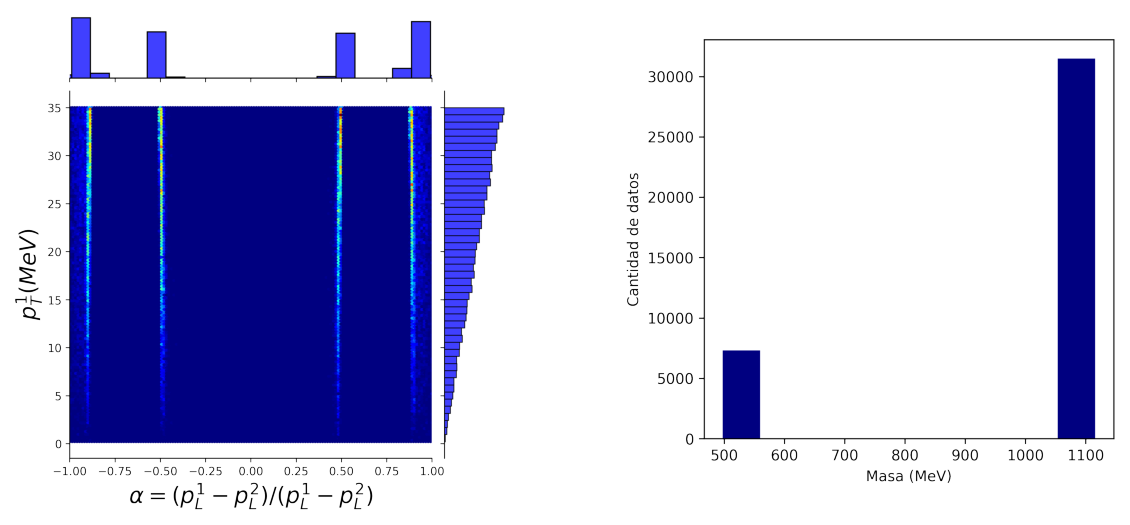

In [53]:
graf_pT_peq = sns.jointplot(x=p_T_peq['alpha'].values, y=p_T_peq['p1T'].values, 
                            kind='hex',height=6,cmap='jet',color='b',gridsize=200)
fig = plt.figure(figsize=(5,5))
hist_pT_peq = p_T_peq['Mrec'].hist(color='navy')
plt.xlabel("Masa (MeV)")
plt.ylabel("Cantidad de datos")
plt.grid(0)

graf_pT_peq.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
graf_pT_peq.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
graf_pT_peq.ax_joint.set_xlim((-1,1))

graf_pT_peq.savefig('graf_pT_peq.png', dpi=300, bbox_inches='tight')
plt.savefig('hist_pT_peq.png', dpi=300, bbox_inches='tight')
plt.close(graf_pT_peq.fig)
plt.close()
## Las visualizamos con matplotlib
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('graf_pT_peq.png'))
axarr[1].imshow(mpimg.imread('hist_pT_peq.png'))
[ax.set_axis_off() for ax in axarr.ravel()]
plt.show()

En la figura de la izquierda se puede observar el gráfico de armenteros para valores pequeños de momento transversal y en la figura de la derecha la distribución de las masas reconstruidas.

A diferencia del caso 1, en está figura las masas reconstruidas solo presentan dos valores, los valores de las masas de $K_{0}$ y $\Lambda_{0}$, por lo que es posible identificar la partícula madre de cualquier evento.

Esto tiene sentido, en el caso teórico (sin smearing) la ecuación del paso 14 debería ser suficiente para identificar las partículas.

Ahora analicemos que sucede cuando es un smearing pequeño.

### Caso 3: Smearing pequeño
Consideremos ahora un smearing más pequeño que el dado en el enunciado, suponiendo que ajustamos nuestras desintegraciones a condiciones experimentales más refinadas. Para ello, veamos qué sucede:

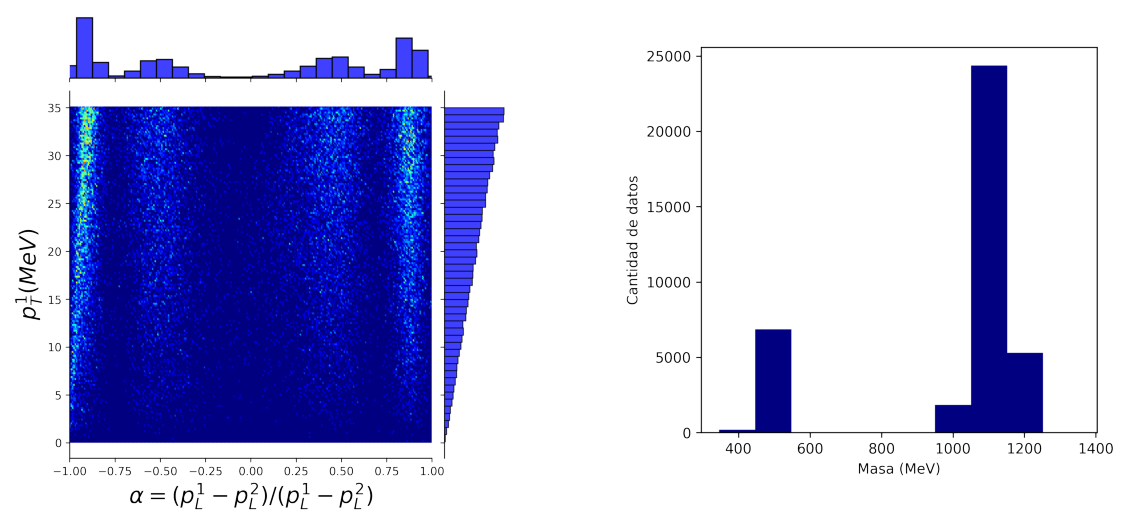

In [54]:
sm_peq_1, sm_peq_2 = agregar_efecto_detector(n_k, n_anti_lambda, n_lambda,
                                                                             vec_e_p_lab_p1,theta_lab_p1, 
                                                                             phi_lab_p1,vec_e_p_lab_p2,
                                                                             theta_lab_p2,phi_lab_p2,
                                                                            sigmas=[0.01,0.01,0.01])

p_T_1_sm, p_T_2_sm, alpha_sm = p_transverso_alfa(sm_peq_1, sm_peq_2)

dicty = {'p1T': p_T_1_sm, 'alpha': p_T_2_sm}
dat = pd.DataFrame(data = dicty)
dat = dat.dropna()
dat['Mrec'] = M_rec(sm_peq_1, sm_peq_2)
p_T_peq = dat[dat['p1T'] <= lim_pT]

graf_pT_peq_smearing = sns.jointplot(x=p_T_smearing['alpha'].values, y=p_T_smearing['p1T'].values,
                                     kind='hex',height=6,cmap='jet',color='b',gridsize=300)

graf_pT_peq_smearing.ax_joint.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
graf_pT_peq_smearing.ax_joint.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
graf_pT_peq_smearing.ax_joint.set_xlim((-1,1))

fig = plt.figure(figsize=(5,5))
hist_pT_peq_smearing = p_T_peq['Mrec'].hist(color='navy')
plt.xlabel("Masa (MeV)")
plt.ylabel("Cantidad de datos")
plt.grid(0)
graf_pT_peq_smearing.savefig('graf_pT_sm.png', dpi=300, bbox_inches='tight')
plt.savefig('hist_pT_sm.png', dpi=300, bbox_inches='tight')
plt.close(graf_pT_peq_smearing.fig)
plt.close()
## Las visualizamos con matplotlib
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

axarr[0].imshow(mpimg.imread('graf_pT_sm.png'))
axarr[1].imshow(mpimg.imread('hist_pT_sm.png'))
[ax.set_axis_off() for ax in axarr.ravel()]
plt.show()

Nuevamente en la figura de la izquierda se puede observar el gráfico de armenteros para valores pequeños de momento transversal y en la figura de la derecha la distribución de las masas reconstruidas.

A diferencia del caso 2, en está figura las masas reconstruidas no presentan unicamente dos valores; sin embargo, los valores que presentan se encuentran bien distribuidos alredor de las masas de $K_{0}$ y $\Lambda_{0}$, por lo que aunque haya smearing es posible identificar la partícula madre de cualquier evento.

### Ventana 2D en el Plot de Armenteros para seleccionar solo $K_0$ y explorar cuántos $\Lambda_0$ “se cuelan”.

Lo primero que haremos ahora es definir qué es una ventana de $K_0$ para nosotros. Para ello, consideramos como ventana el 80% de las partículas $K_0$ de mayor momento transversal. De esta forma, dejamos las $K_0$ que pueden confundirse fácilmente como $\Lambda_0$ o  $\bar{\Lambda}_0$ por fuera (i.e las de más bajo $p_T$) y nos enfocamos entonces en ver cuantas $\Lambda_0$ y $\bar{\Lambda}_0$ se cuelan en dicha ventana. Las partículas coladas serán las de mayor momento transversal.

De esta forma, las partículas se pueden distinguir visualmente de forma más sencilla.

In [55]:
pT_k0 = p_T_1_corregido[:n_k]
alpha_k0 = alpha_corregido[:n_k]
pT_lambda0 = p_T_1_corregido[n_k:]
alpha_lambda0 = alpha_corregido[n_k:]

In [56]:
data_k0 = pd.DataFrame(data = {'p1T': pT_k0, 'alpha': alpha_k0})
data_lambda0 = pd.DataFrame(data = {'p1T': pT_lambda0, 'alpha': alpha_lambda0})

In [57]:
data_k0 = data_k0.sort_values('p1T')
data_k0 = data_k0[int(0.2*len(data_k0)):]

In [58]:
lambda0_colados = data_lambda0[data_lambda0['p1T'] >= data_k0['p1T'].iloc[0]]

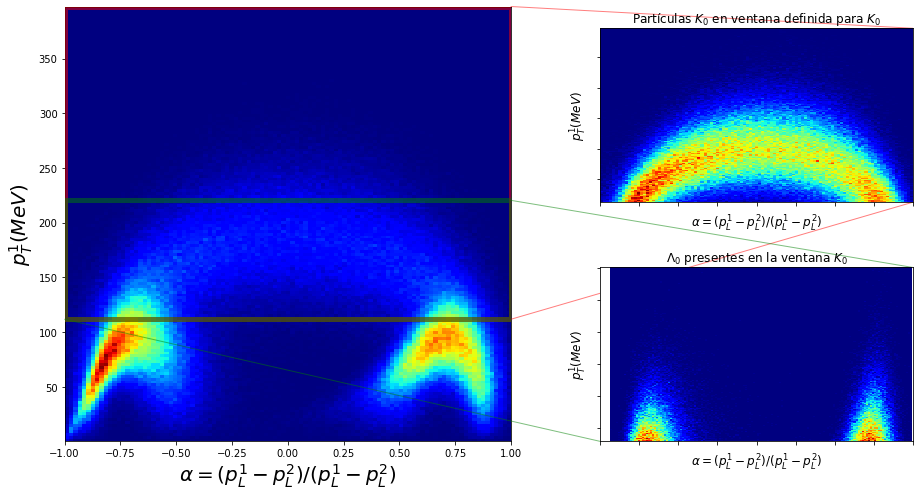

In [59]:
f, axarr = plt.subplots(figsize=(8, 8))

plt.hist2d(data2['alpha'], data2['p1T'], bins=150, cmap='jet')

plt.xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 20)
plt.ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 20)
plt.xlim((-1,1))

axins = axarr.inset_axes([1.2, 0.55, 0.7, 0.4])
# sub region of the original image
x1, x2, y1, y2 = -1, 1, min(data_k0['p1T']), max(data2['p1T'])
axins.hist2d(data_k0['alpha'], data_k0['p1T'], bins=150, cmap='jet')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title(r'Partículas $K_0$ en ventana definida para $K_0$')
axins.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 12)
axins.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 12)
axarr.indicate_inset_zoom(axins, linewidth=5, edgecolor="red")



axins2 = axarr.inset_axes([1.2, 0, 0.7, 0.4])
# sub region of the original image
x1, x2, y1, y2 = -1, 1, min(lambda0_colados['p1T']), max(lambda0_colados['p1T'])
axins2.hist2d(lambda0_colados['alpha'], lambda0_colados['p1T'], bins=150, cmap='jet')
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
axins2.set_xticklabels([])
axins2.set_yticklabels([])
axins2.set_title(r'$\Lambda_0$ presentes en la ventana $K_0$')
axins2.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 12)
axins2.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 12)


axarr.indicate_inset_zoom(axins2, linewidth=5, edgecolor="green")




plt.show()

La gráfica de la izquierda muestra dos ventanas: una roja (donde se encuentran icullas partas $K_0$ seleccionadas en la ventana) y una verde (donde se encuentran las partículas $\Lambda$ y $\bar{\Lambda}_0$ (derecha e izquierda, respectivamente) que se colaron. A continuacóni, presentamos tamébn la cantidad y procentaje de $\Lambda_0$ y $\bar{\Lambda}_0$ que se colaron:

In [60]:
# Aqui decimos cuantas se cuelan
print('La cantidad de Lambdas coladas en la ventana de K_0: {}'.format(len(lambda0_colados)))
print('Representa el {:.2f}% del total de Lambdas'.format(len(lambda0_colados)*100/len(data_lambda0)))
print('Representa el {:.2f}% respecto al total de la ventana'.format(len(lambda0_colados)*100/(len(data_k0) + len(lambda0_colados))))

La cantidad de Lambdas coladas en la ventana de K_0: 65641
Representa el 13.64% del total de Lambdas
Representa el 14.09% respecto al total de la ventana


### Ventana 2D en el Plot de Armenteros para seleccionar solo $K_0$ y explorar cuántos $\Lambda_0$ “se cuelan”.

Ahora queremos ver cuantas partículas $K_{0}$ se cuelan en las ventanas de $\Lambda_{0}$, para eso lo que se hizó fue definir cada ventana como el 90% de las partículas de menor momento transversal (dejamos afuera las que más se pueden confundir con $K_0$ al tener mayor $p_T$) y analizar de manera análoga al caso anterior. Con esto, aplicamos un corte para minimizar la cantidad de $K_0$ que seleccionamos cuando queremos ver solo $\Lamda_0$ y $\bar{\Lambda}_0$.

In [61]:
pT_lambda0 = p_T_1_corregido[n_k:n_k + n_lambda]
alpha_lambda0 = alpha_corregido[n_k:n_k + n_lambda]
pT_anti_lambda0 = p_T_1_corregido[n_k + n_lambda:]
alpha_anti_lambda0 = alpha_corregido[n_k + n_lambda:]

In [62]:
data_k0 = pd.DataFrame(data = {'p1T': pT_k0, 'alpha': alpha_k0})
data_lambda0 = pd.DataFrame(data = {'p1T': pT_lambda0, 'alpha': alpha_lambda0})
data_anti_lambda0 = pd.DataFrame(data = {'p1T': pT_anti_lambda0, 'alpha': alpha_anti_lambda0})



In [63]:
data_lambda0 = data_lambda0.sort_values('p1T', ascending=False)
data_lambda0 = data_lambda0[int(0.1*len(data_lambda0)):]

data_anti_lambda0 = data_anti_lambda0.sort_values('p1T', ascending=False)
data_anti_lambda0 = data_anti_lambda0[int(0.1*len(data_anti_lambda0)):]

In [64]:
k0_colados_lambda = data_k0[data_k0['p1T'] <= data_lambda0['p1T'].iloc[0]]
k0_colados_lambda = k0_colados_lambda[k0_colados_lambda['alpha'] > 0]

k0_colados_anti_lambda = data_k0[data_k0['p1T'] <= data_anti_lambda0['p1T'].iloc[0]]
k0_colados_anti_lambda = k0_colados_anti_lambda[k0_colados_anti_lambda['alpha'] < 0]

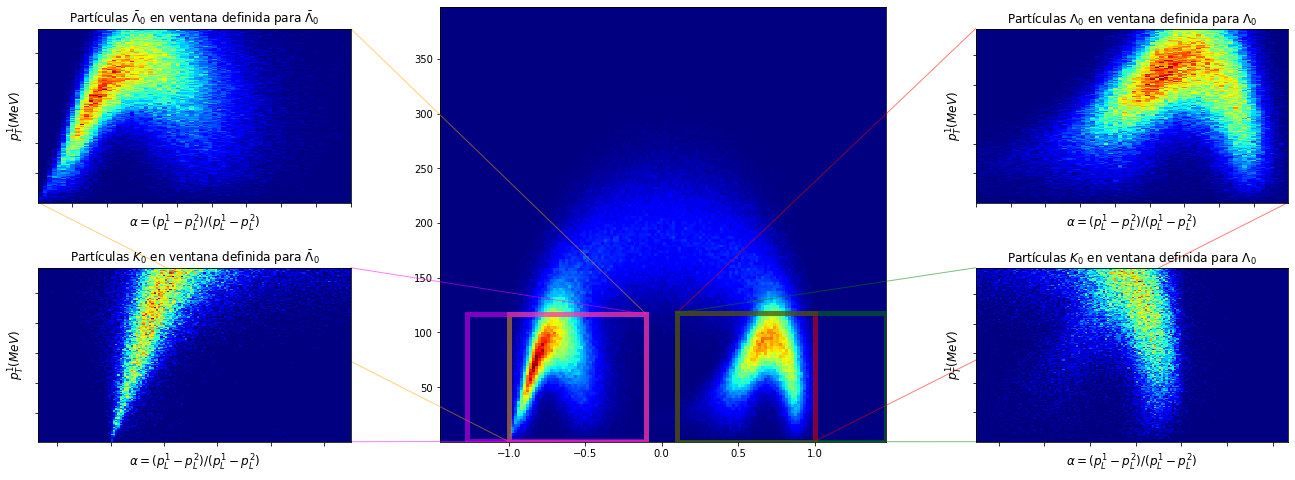

In [65]:
f, axarr = plt.subplots(figsize=(8, 8))

plt.hist2d(data2['alpha'], data2['p1T'], bins=150, cmap='jet')
# Ventana Lambdas
axins = axarr.inset_axes([1.2, 0.55, 0.7, 0.4])
x1, x2, y1, y2 = 0.1, max(data_lambda0['alpha']), min(data_lambda0['p1T']), max(data_lambda0['p1T'])
axins.hist2d(data_lambda0['alpha'], data_lambda0['p1T'], bins=150, cmap='jet')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title(r'Partículas $\Lambda_0$ en ventana definida para $\Lambda_0$')
axarr.indicate_inset_zoom(axins, linewidth=5, edgecolor="red")
# Ventna Antilambdas
axins2 = axarr.inset_axes([-0.9, 0.55, 0.7, 0.4])
x1, x2, y1, y2 = min(data_anti_lambda0['alpha']), -0.1, min(data_anti_lambda0['p1T']), max(data_anti_lambda0['p1T'])
axins2.hist2d(data_anti_lambda0['alpha'], data_anti_lambda0['p1T'], bins=150, cmap='jet')
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
axins2.set_xticklabels([])
axins2.set_yticklabels([])
axins2.set_title(r'Partículas $\bar{\Lambda}_0$ en ventana definida para $\bar{\Lambda}_0$')
axarr.indicate_inset_zoom(axins2, linewidth=5, edgecolor="orange")
#Ventana K0 en Lambda
axins3 = axarr.inset_axes([1.2, 0, 0.7, 0.4])
x1, x2, y1, y2 = 0.1, max(k0_colados_lambda['alpha']), min(k0_colados_lambda['p1T']), max(k0_colados_lambda['p1T'])
axins3.hist2d(k0_colados_lambda['alpha'], k0_colados_lambda['p1T'], bins=150, cmap='jet')
axins3.set_xlim(x1, x2)
axins3.set_ylim(y1, y2)
axins3.set_xticklabels([])
axins3.set_yticklabels([])
axins3.set_title(r'Partículas $K_0$ en ventana definida para $\Lambda_0$')
axarr.indicate_inset_zoom(axins3, linewidth=5, edgecolor="green")
#Ventana K0 en AntiLambda
axins4 = axarr.inset_axes([-0.9, 0, 0.7, 0.4])
x1, x2, y1, y2 = min(k0_colados_anti_lambda['alpha']), -0.1, min(k0_colados_anti_lambda['p1T']), max(k0_colados_anti_lambda['p1T'])
axins4.hist2d(k0_colados_anti_lambda['alpha'], k0_colados_anti_lambda['p1T'], bins=150, cmap='jet')
axins4.set_xlim(x1, x2)
axins4.set_ylim(y1, y2)
axins4.set_xticklabels([])
axins4.set_yticklabels([])
axins4.set_title(r'Partículas $K_0$ en ventana definida para $\bar{\Lambda}_0$')
axarr.indicate_inset_zoom(axins4, linewidth=5, edgecolor="magenta")

axins.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 12)
axins.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 12)
axins2.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 12)
axins2.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 12)
axins3.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 12)
axins3.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 12)
axins4.set_xlabel(r'$\alpha = (p_{L}^{1} - p_{L}^{2})/(p_{L}^{1} - p_{L}^{2})$', fontsize = 12)
axins4.set_ylabel(r'$p_{T}^{1} (MeV)$', fontsize = 12)


plt.show()

En la gráfica podemos ver las cuatro ventanas que elegimos. A la izquierda, arriba, tenemos todas las partículas $\Lambda_0$, y justo debajo de ella, la cantidad de $K_0$ que se cuelan en dicha ventana. Vemos que son todas las del inicio. De forma análoga, a la derecha se muestra lo mismo, pero para $\bar{\Lambda}_0$. A continuación, se muestra cuantos $K_0$ se cuelan en las ventanas de los $\Lambda_0$ y $\bar{\Lambda}_0$.

In [66]:
# Aqui decimos cuantas se cuelan
print('La cantidad de K_0 coladas en la ventana de Lambda_0: {}'.format(len(k0_colados_lambda)))
print('La cantidad de K_0 coladas en la ventana de Anti-lambda_0: {}'.format(len(k0_colados_anti_lambda)))

print('Ambas cantidad representan el {:.2f}% del total de K0'.format(len(k0_colados_anti_lambda + k0_colados_lambda)*100/len(data_k0)))

La cantidad de K_0 coladas en la ventana de Lambda_0: 61807
La cantidad de K_0 coladas en la ventana de Anti-lambda_0: 50469
Ambas cantidad representan el 22.44% del total de K0


## Conclusiones

* Se replicó exitosamente el grafico de Armenteros. Esto permitió corroborar los resultados experimentales reportados en la referencia [1].

* Se vio que al reflejar los productos 1 y 2 del decaimiento respecto al eje vertical, el gráfico de Armenteros simplemente se ve reflejado respecto al eje y, por lo que para analizar los datos no hay necesidad de hacer ambas gráficas.

* Se observó que entre mayor sea el smearing, la resolución de la gráfica se ve afectada en mayor medida. En particular se observó que el smearing en $E$ y $\phi$ afecta más que el smearing en $\theta$.

* Al reconstruir la masa del decaimiento se evidenció que entre mayor sea el smearing de los datos, es más difícil identificar a que partícula hace referencia la masa reconstruida. 

* Etiquetando las partículas en la simulación se encontró una concentración del 22.20% de partículas $K_{0}$ coladas en la ventana 2d de las partículas $\Lambda_{0}$ y una concentración del 15% de partículas $\lambda_{0}$ coladas en la ventana 2d de las partículas $K_{0}$.

## Referencias:

[1] Lippmann, C. (2012). Particle identification. Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment, 666, 148-172.

[2] Material de clase física de partículas. Uniandes, 2022. Profesor Bernardo Gomez.